# Model Feature Selection

In [8]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## statistical analysis + modeling
from statsmodels.stats.outliers_influence import variance_inflation_factor

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pitcher_data_w_injuries = pd.read_csv('pitcher_data_w_injuries.csv').iloc[:, 1:].copy()
pitcher_data_w_injuries_train = pitcher_data_w_injuries[pitcher_data_w_injuries['game_year'].isin(range(2018, 2024))]
pitcher_data_w_injuries_test = pitcher_data_w_injuries[pitcher_data_w_injuries['game_year'] == 2024]

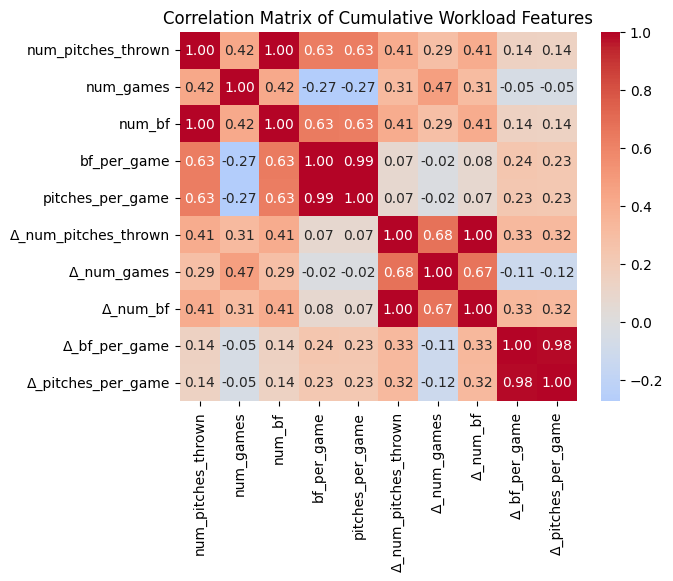

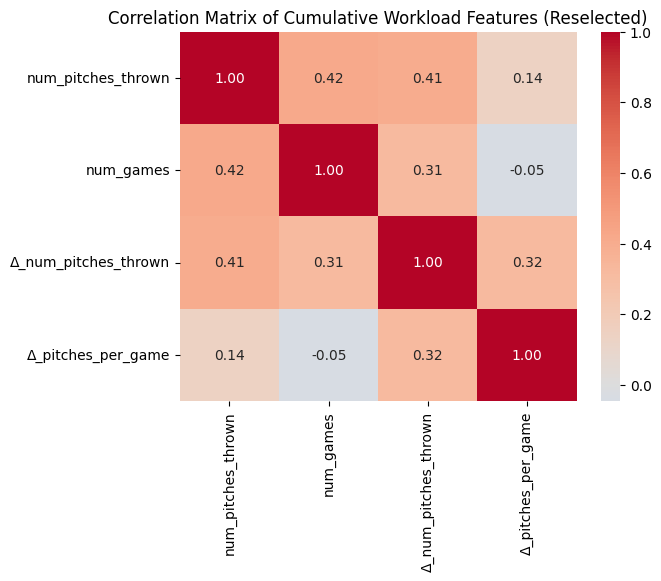

,feature,VIF
0,num_pitches_thrown,2.369347
1,num_games,2.325381
2,Δ_num_pitches_thrown,1.213367
3,Δ_pitches_per_game,1.160497


In [13]:
## cumulative workload features
cumulative_workload_features = ['num_pitches_thrown', 'num_games', 'num_bf', 'bf_per_game', 'pitches_per_game', 
                                'Δ_num_pitches_thrown', 'Δ_num_games', 'Δ_num_bf', 'Δ_bf_per_game', 'Δ_pitches_per_game',]
cumulative_workload_corr_matrix = pitcher_data_w_injuries[cumulative_workload_features].corr()
plt.figure()
sns.heatmap(cumulative_workload_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Cumulative Workload Features')
plt.show()

## VIF analysis
workload_features_selected = ['num_pitches_thrown', 'num_games', 'Δ_num_pitches_thrown', 'Δ_pitches_per_game',]
workload_X = pitcher_data_w_injuries_train[workload_features_selected]
vif_data = pd.DataFrame()
vif_data['feature'] = workload_X.columns
vif_data['VIF'] = [variance_inflation_factor(workload_X.values, i) for i in range(workload_X.shape[1])]

workload_selected_corr_matrix = pitcher_data_w_injuries[workload_features_selected].corr()
plt.figure()
sns.heatmap(workload_selected_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Cumulative Workload Features (Reselected)')
plt.show()

vif_data

<Figure size 640x480 with 0 Axes>

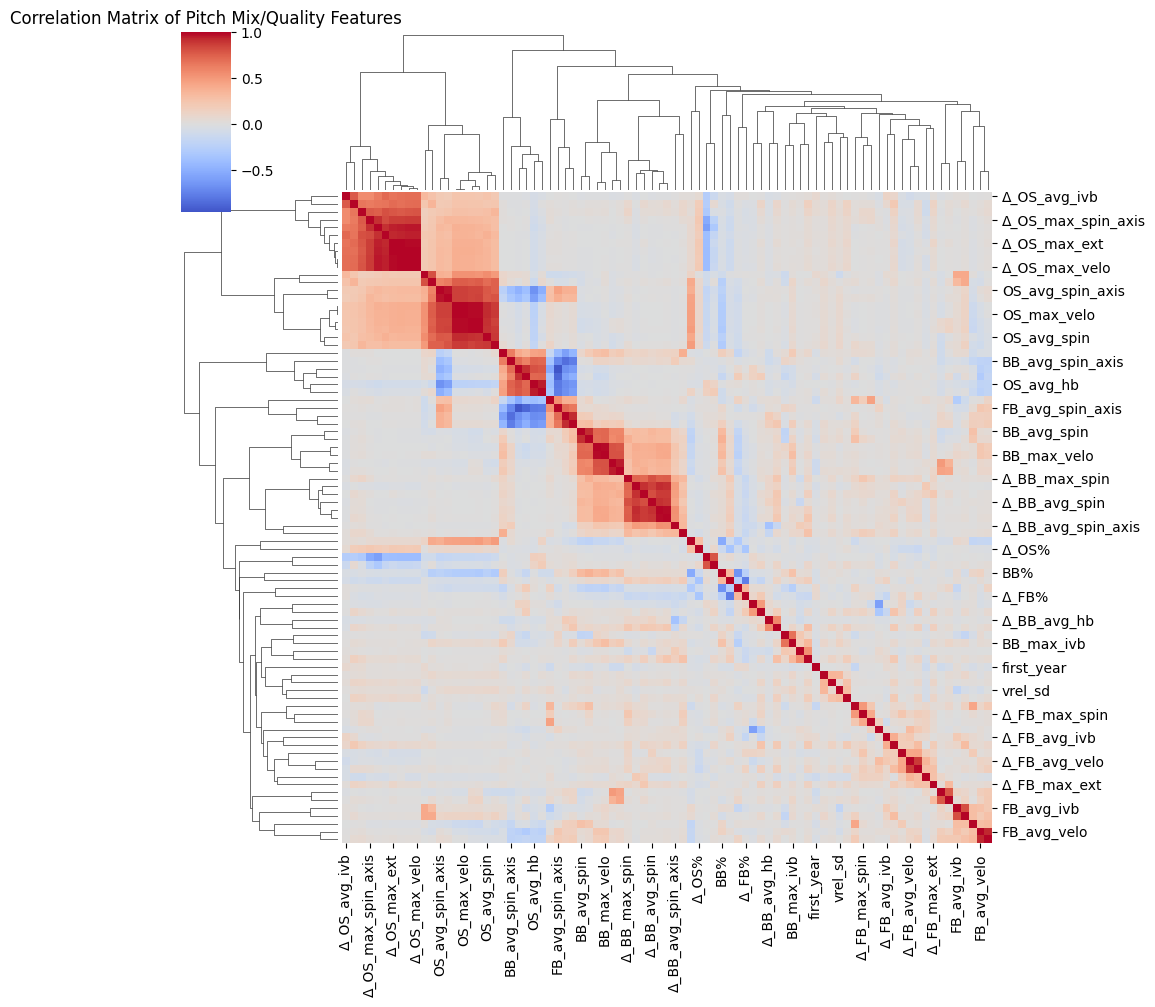

KeyboardInterrupt: 

In [17]:
## pitch mix + quality features
pitch_features = ['hrel_sd', 'vrel_sd', 'BB%', 'FB%', 'OS%', 'BB_avg_velo', 'FB_avg_velo', 'OS_avg_velo', 
                'BB_avg_hb', 'FB_avg_hb', 'OS_avg_hb', 'BB_avg_ivb', 'FB_avg_ivb', 'OS_avg_ivb', 'BB_avg_spin', 'FB_avg_spin', 'OS_avg_spin', 
                'BB_avg_ext', 'FB_avg_ext', 'OS_avg_ext', 'BB_avg_spin_axis', 'FB_avg_spin_axis', 'OS_avg_spin_axis', 'BB_max_velo', 
                'FB_max_velo', 'OS_max_velo', 'BB_max_hb', 'FB_max_hb', 'OS_max_hb', 'BB_max_ivb', 'FB_max_ivb', 'OS_max_ivb', 
                'BB_max_spin', 'FB_max_spin', 'OS_max_spin', 'BB_max_ext', 'FB_max_ext', 'OS_max_ext', 'BB_max_spin_axis', 'FB_max_spin_axis', 'OS_max_spin_axis',
                'Δ_hrel_sd', 'Δ_vrel_sd', 'Δ_BB%', 'Δ_FB%', 'Δ_OS%', 'Δ_BB_avg_velo', 'Δ_FB_avg_velo', 'Δ_OS_avg_velo', 
                'Δ_BB_avg_hb', 'Δ_FB_avg_hb', 'Δ_OS_avg_hb', 'Δ_BB_avg_ivb', 'Δ_FB_avg_ivb', 'Δ_OS_avg_ivb', 'Δ_BB_avg_spin', 'Δ_FB_avg_spin', 'Δ_OS_avg_spin',
                'Δ_BB_avg_ext', 'Δ_FB_avg_ext',  'Δ_OS_avg_ext', 'Δ_BB_avg_spin_axis', 'Δ_FB_avg_spin_axis', 'Δ_OS_avg_spin_axis', 
                'Δ_BB_max_velo', 'Δ_FB_max_velo', 'Δ_OS_max_velo', 'Δ_BB_max_hb', 'Δ_FB_max_hb', 'Δ_OS_max_hb', 'Δ_BB_max_ivb', 
                'Δ_FB_max_ivb', 'Δ_OS_max_ivb', 'Δ_BB_max_spin', 'Δ_FB_max_spin', 'Δ_OS_max_spin', 'Δ_BB_max_ext', 'Δ_FB_max_ext', 'Δ_OS_max_ext', 
                'Δ_BB_max_spin_axis', 'Δ_FB_max_spin_axis', 'Δ_OS_max_spin_axis', 'first_year',
                ]

pitch_corr_matrix = pitcher_data_w_injuries[pitch_features].corr()

plt.figure()
sns.clustermap(pitch_corr_matrix, cmap="coolwarm", center=0)
plt.title('Correlation Matrix of Pitch Mix/Quality Features')
plt.show()

from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

X = pitcher_data_w_injuries_train[pitch_features]

# Step 1: LASSO with CV to select features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso_cv = LogisticRegressionCV(
    penalty='l1',
    solver='liblinear',
    cv=10,
    class_weight='balanced',
    max_iter=5000,
    random_state=42
)
lasso_cv.fit(X_scaled, y)

# Features selected by LASSO
selected_mask = lasso_cv.coef_[0] != 0
selected_features = np.where(selected_mask)[0]

print(f"LASSO selected {len(selected_features)} features")

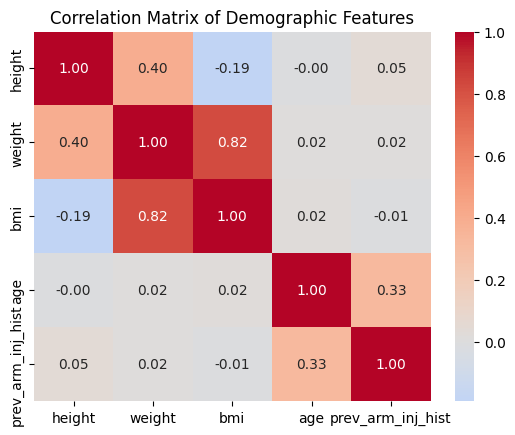

In [17]:
## demographic features
demo_features = ['height', 'weight', 'bmi', 'age', 'prev_arm_inj_hist']
demo_corr_matrix = pitcher_data_w_injuries[demo_features].corr()
plt.figure()
sns.heatmap(demo_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Demographic Features')
plt.show()

In [2]:
# Feature Selection for MLB Pitcher Injury Prediction
# Following a multi-step approach to handle multicollinearity and identify robust predictors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")


Libraries imported successfully!


## Step 0: Load and Prepare Data


In [31]:
# Load data
df = pd.read_csv('pitcher_data_w_injuries.csv')

# Convert game_year to string so it's treated as categorical
df['game_year'] = df['game_year'].astype(str)

print(f"Data shape: {df.shape}")
print(f"Years in data: {sorted(df['game_year'].unique())}")

# Split into training (2018-2023) and test (2024) sets
train_df = df[df['game_year'].isin(['2018', '2019', '2020', '2021', '2022', '2023'])].copy()
test_df = df[df['game_year'] == '2024'].copy()

print(f"\nTraining set: {train_df.shape[0]} rows")
print(f"Test set: {test_df.shape[0]} rows")
print(f"\nInjury rate in training: {train_df['injury_next_year'].mean():.3f}")
print(f"Injury rate in test: {test_df['injury_next_year'].mean():.3f}")

# Define feature categories
unmodifiable_features = [
    'birth_country', 'height', 'weight', 'hand', 'age', 'bmi', 'prev_arm_inj_hist'
]

modifiable_features = [
    'num_pitches_thrown', 'num_games', 'num_bf', 'bf_per_game', 'pitches_per_game',
    'pitcher_role', 'hrel_sd', 'vrel_sd',
    'BB%', 'FB%', 'OS%',
    'BB_avg_velo', 'FB_avg_velo', 'OS_avg_velo',
    'BB_avg_hb', 'FB_avg_hb', 'OS_avg_hb',
    'BB_avg_ivb', 'FB_avg_ivb', 'OS_avg_ivb',
    'BB_avg_spin', 'FB_avg_spin', 'OS_avg_spin',
    'BB_avg_ext', 'FB_avg_ext', 'OS_avg_ext',
    'BB_avg_spin_axis', 'FB_avg_spin_axis', 'OS_avg_spin_axis',
    'BB_max_velo', 'FB_max_velo', 'OS_max_velo',
    'BB_max_hb', 'FB_max_hb', 'OS_max_hb',
    'BB_max_ivb', 'FB_max_ivb', 'OS_max_ivb',
    'BB_max_spin', 'FB_max_spin', 'OS_max_spin',
    'BB_max_ext', 'FB_max_ext', 'OS_max_ext',
    'BB_max_spin_axis', 'FB_max_spin_axis', 'OS_max_spin_axis'
]

# Get all delta features (columns starting with Δ)
delta_features = [col for col in df.columns if col.startswith('Δ_')]
delta_features.append('first_year')  # Must be paired with delta features

print(f"\nUnmodifiable features: {len(unmodifiable_features)}")
print(f"Modifiable features: {len(modifiable_features)}")
print(f"Delta features: {len(delta_features)}")


Data shape: (6300, 107)
Years in data: ['2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']

Training set: 4695 rows
Test set: 802 rows

Injury rate in training: 0.201
Injury rate in test: 0.222

Unmodifiable features: 7
Modifiable features: 47
Delta features: 47


## Step 1: Correlation-Based Clustering


In [32]:
def correlation_clustering(features_df, threshold=0.20, method='ward'):
    """
    Perform correlation-based clustering to identify redundant predictors.
    
    Parameters:
    - features_df: DataFrame with features (already standardized)
    - threshold: Distance threshold for cutting dendrogram
    - method: Clustering method ('ward', 'complete', 'average')
    
    Returns:
    - cluster_labels: Dictionary mapping features to cluster IDs
    - dendrogram_data: Data for visualization
    - correlation_matrix: Correlation matrix
    """
    # Compute correlation matrix
    corr_matrix = features_df.corr().abs()
    
    # Convert correlations to distances: d_ij = 1 - |rho_ij|
    distance_matrix = 1 - corr_matrix.values
    
    # Apply hierarchical clustering
    # Note: Ward method requires squared distances, but we'll use complete linkage
    # which works better with correlation distances
    if method == 'ward':
        # For Ward, we need to ensure non-negative distances
        linkage_matrix = linkage(squareform(distance_matrix, checks=False), method='ward')
    else:
        linkage_matrix = linkage(squareform(distance_matrix, checks=False), method=method)
    
    # Cut dendrogram at threshold
    cluster_labels = fcluster(linkage_matrix, threshold, criterion='distance')
    
    # Create mapping
    feature_clusters = {}
    for i, feature in enumerate(features_df.columns):
        feature_clusters[feature] = cluster_labels[i]
    
    return feature_clusters, linkage_matrix, corr_matrix

def select_cluster_representatives(features_df, target, cluster_dict):
    """
    Select one representative from each cluster based on:
    1. Univariate predictive strength (correlation with target)
    2. Data completeness (fewer missing values)
    3. Interpretability (prefer simpler features)
    """
    representatives = []
    
    # Get unique clusters
    unique_clusters = set(cluster_dict.values())
    
    for cluster_id in unique_clusters:
        cluster_features = [f for f, c in cluster_dict.items() if c == cluster_id]
        
        if len(cluster_features) == 1:
            representatives.append(cluster_features[0])
        else:
            # Score each feature in cluster
            scores = []
            for feature in cluster_features:
                # Check if feature exists and has data
                if feature not in features_df.columns:
                    continue
                
                # Compute univariate correlation with target
                feature_data = features_df[feature].dropna()
                if len(feature_data) == 0:
                    continue
                
                # Get corresponding target values
                valid_idx = features_df[feature].notna()
                if valid_idx.sum() < 100:  # Need minimum data points
                    continue
                
                target_subset = target[valid_idx]
                feature_subset = features_df.loc[valid_idx, feature]
                
                # Compute absolute correlation
                if feature_subset.std() > 0:
                    corr = abs(np.corrcoef(feature_subset, target_subset)[0, 1])
                else:
                    corr = 0
                
                # Data completeness score
                completeness = valid_idx.sum() / len(features_df)
                
                # Combined score (weighted)
                score = 0.6 * corr + 0.4 * completeness
                scores.append((feature, score, corr, completeness))
            
            if scores:
                # Select feature with highest score
                best_feature = max(scores, key=lambda x: x[1])[0]
                representatives.append(best_feature)
    
    return representatives

print("Correlation clustering functions defined!")


Correlation clustering functions defined!


Processing unmodifiable features...
Unmodifiable features after encoding: 34

Processing modifiable + delta features...
Modifiable + delta features after encoding: 94
Skipping correlation heatmap for unmodifiable (too many features)


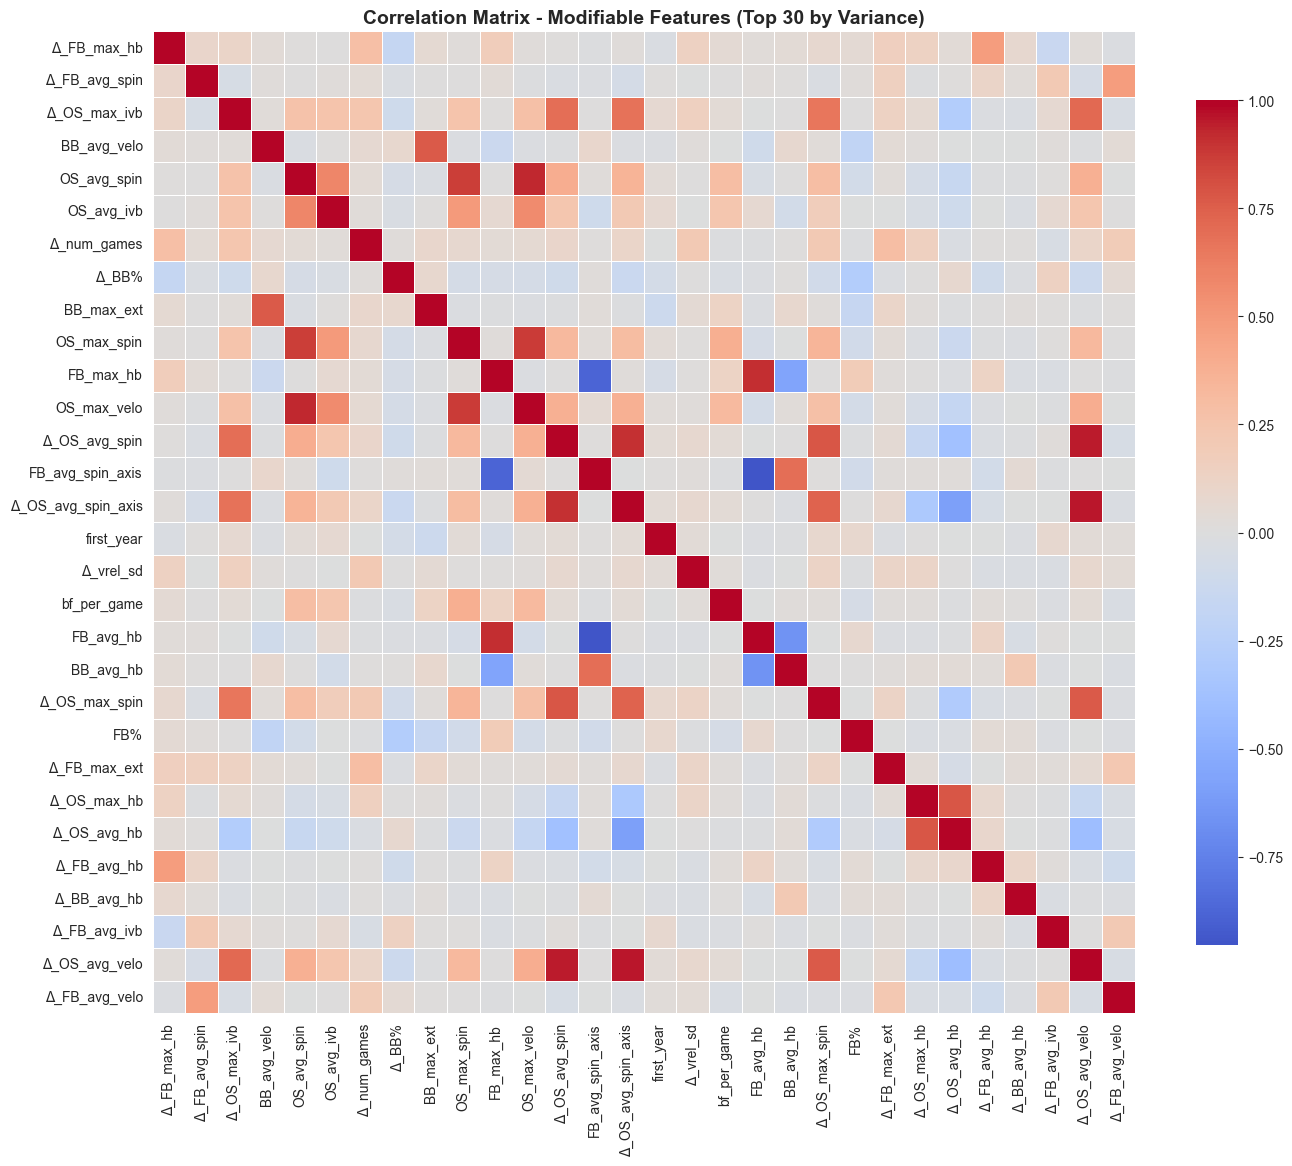

In [33]:
# Prepare data for clustering - handle categorical variables
def prepare_features_for_clustering(df, feature_list, target_col='injury_next_year'):
    """
    Prepare features for clustering by:
    1. Handling categorical variables (one-hot encoding)
    2. Standardizing numerical features
    3. Handling missing values
    """
    # Filter to available features
    available_features = [f for f in feature_list if f in df.columns]
    feature_df = df[available_features].copy()
    
    # Separate categorical and numerical
    categorical_features = []
    numerical_features = []
    
    for col in feature_df.columns:
        if feature_df[col].dtype == 'object' or feature_df[col].dtype.name == 'category':
            categorical_features.append(col)
        else:
            numerical_features.append(col)
    
    # One-hot encode categorical features
    if categorical_features:
        feature_df = pd.get_dummies(feature_df, columns=categorical_features, drop_first=True)
    
    # Standardize numerical features
    scaler = StandardScaler()
    if numerical_features:
        feature_df[numerical_features] = scaler.fit_transform(feature_df[numerical_features].fillna(0))
    
    # Fill remaining NaN with 0 (after standardization, mean is 0)
    feature_df = feature_df.fillna(0)
    
    return feature_df, scaler

# Process unmodifiable features
print("Processing unmodifiable features...")
unmod_df, unmod_scaler = prepare_features_for_clustering(
    train_df, unmodifiable_features, 'injury_next_year'
)
print(f"Unmodifiable features after encoding: {unmod_df.shape[1]}")

# Process modifiable + delta features
print("\nProcessing modifiable + delta features...")
mod_features = modifiable_features + delta_features
mod_df, mod_scaler = prepare_features_for_clustering(
    train_df, mod_features, 'injury_next_year'
)
print(f"Modifiable + delta features after encoding: {mod_df.shape[1]}")

# Visualize correlation heatmaps (sample for large feature sets)
if unmod_df.shape[1] <= 20:
    plt.figure(figsize=(10, 8))
    corr_unmod = unmod_df.corr()
    sns.heatmap(corr_unmod, annot=False, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Unmodifiable Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Skipping correlation heatmap for unmodifiable (too many features)")

# For modifiable features, show correlation of a sample
if mod_df.shape[1] > 50:
    # Sample top 30 most variable features
    feature_vars = mod_df.var().sort_values(ascending=False)
    top_features = feature_vars.head(30).index.tolist()
    plt.figure(figsize=(14, 12))
    corr_mod_sample = mod_df[top_features].corr()
    sns.heatmap(corr_mod_sample, annot=False, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, fmt='.2f')
    plt.title('Correlation Matrix - Modifiable Features (Top 30 by Variance)', 
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    plt.figure(figsize=(14, 12))
    corr_mod = mod_df.corr()
    sns.heatmap(corr_mod, annot=False, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Modifiable + Delta Features', 
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


Clustering unmodifiable features...


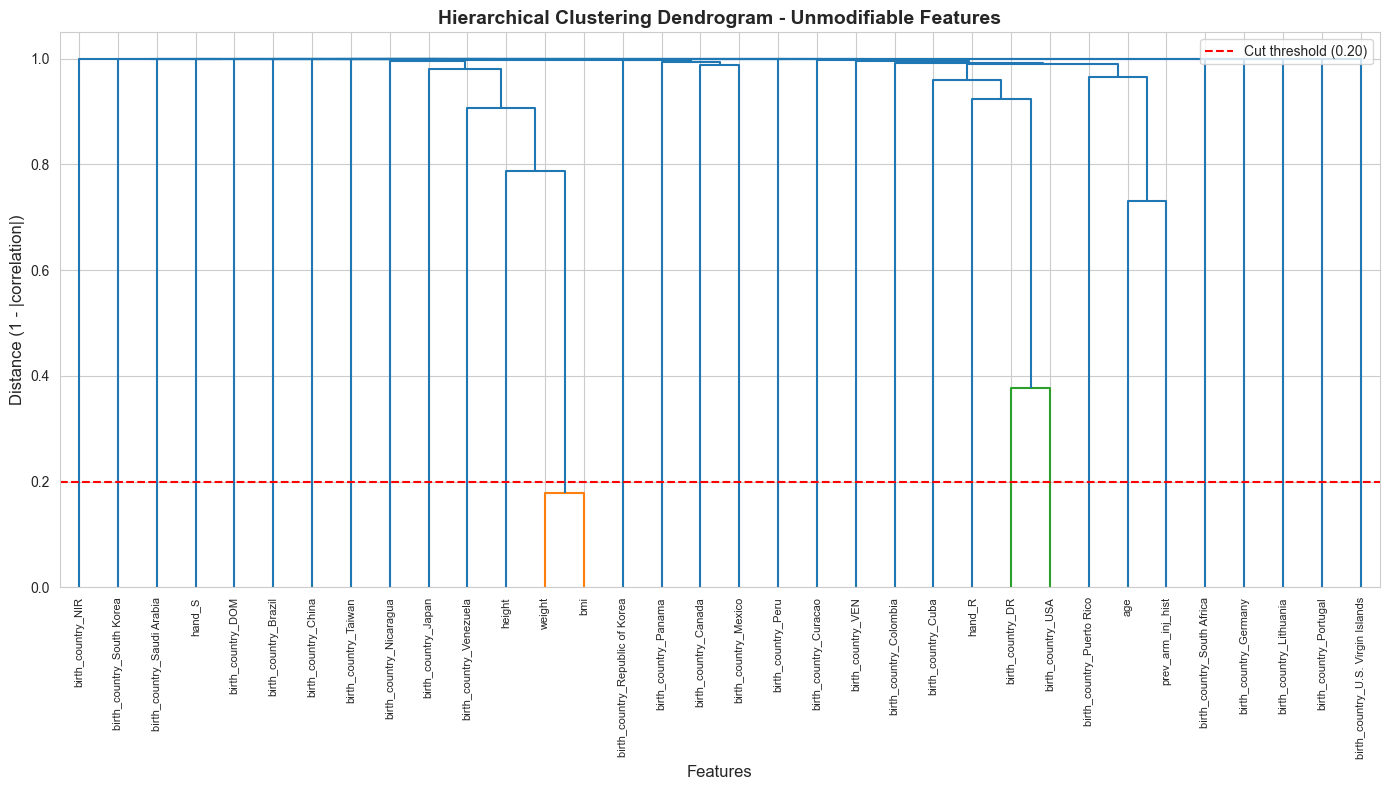


Original unmodifiable features: 7
Features after clustering: 33

Selected representatives:
  - bmi
  - height
  - birth_country_Venezuela
  - birth_country_Japan
  - birth_country_Nicaragua
  - birth_country_Canada
  - birth_country_Mexico
  - birth_country_Panama
  - birth_country_Republic of Korea
  - birth_country_Taiwan
  - birth_country_China
  - birth_country_DR
  - birth_country_USA
  - hand_R
  - birth_country_Cuba
  - age
  - prev_arm_inj_hist
  - birth_country_Puerto Rico
  - birth_country_Colombia
  - birth_country_VEN
  - birth_country_Curacao
  - birth_country_Peru
  - birth_country_Brazil
  - birth_country_DOM
  - birth_country_Germany
  - birth_country_Lithuania
  - birth_country_South Africa
  - hand_S
  - birth_country_Saudi Arabia
  - birth_country_South Korea
  - birth_country_NIR
  - birth_country_Portugal
  - birth_country_U.S. Virgin Islands


In [34]:
# Perform correlation clustering for unmodifiable features
print("Clustering unmodifiable features...")
unmod_clusters, unmod_linkage, unmod_corr = correlation_clustering(
    unmod_df, threshold=0.20, method='complete'
)

# Visualize dendrogram
plt.figure(figsize=(14, 8))
dendrogram(unmod_linkage, labels=unmod_df.columns, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram - Unmodifiable Features', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Distance (1 - |correlation|)', fontsize=12)
plt.axhline(y=0.20, color='r', linestyle='--', label='Cut threshold (0.20)')
plt.legend()
plt.tight_layout()
plt.show()

# Select cluster representatives
unmod_representatives = select_cluster_representatives(
    unmod_df, train_df['injury_next_year'], unmod_clusters
)

print(f"\nOriginal unmodifiable features: {len(unmodifiable_features)}")
print(f"Features after clustering: {len(unmod_representatives)}")
print(f"\nSelected representatives:")
for rep in unmod_representatives:
    print(f"  - {rep}")


Clustering modifiable + delta features...


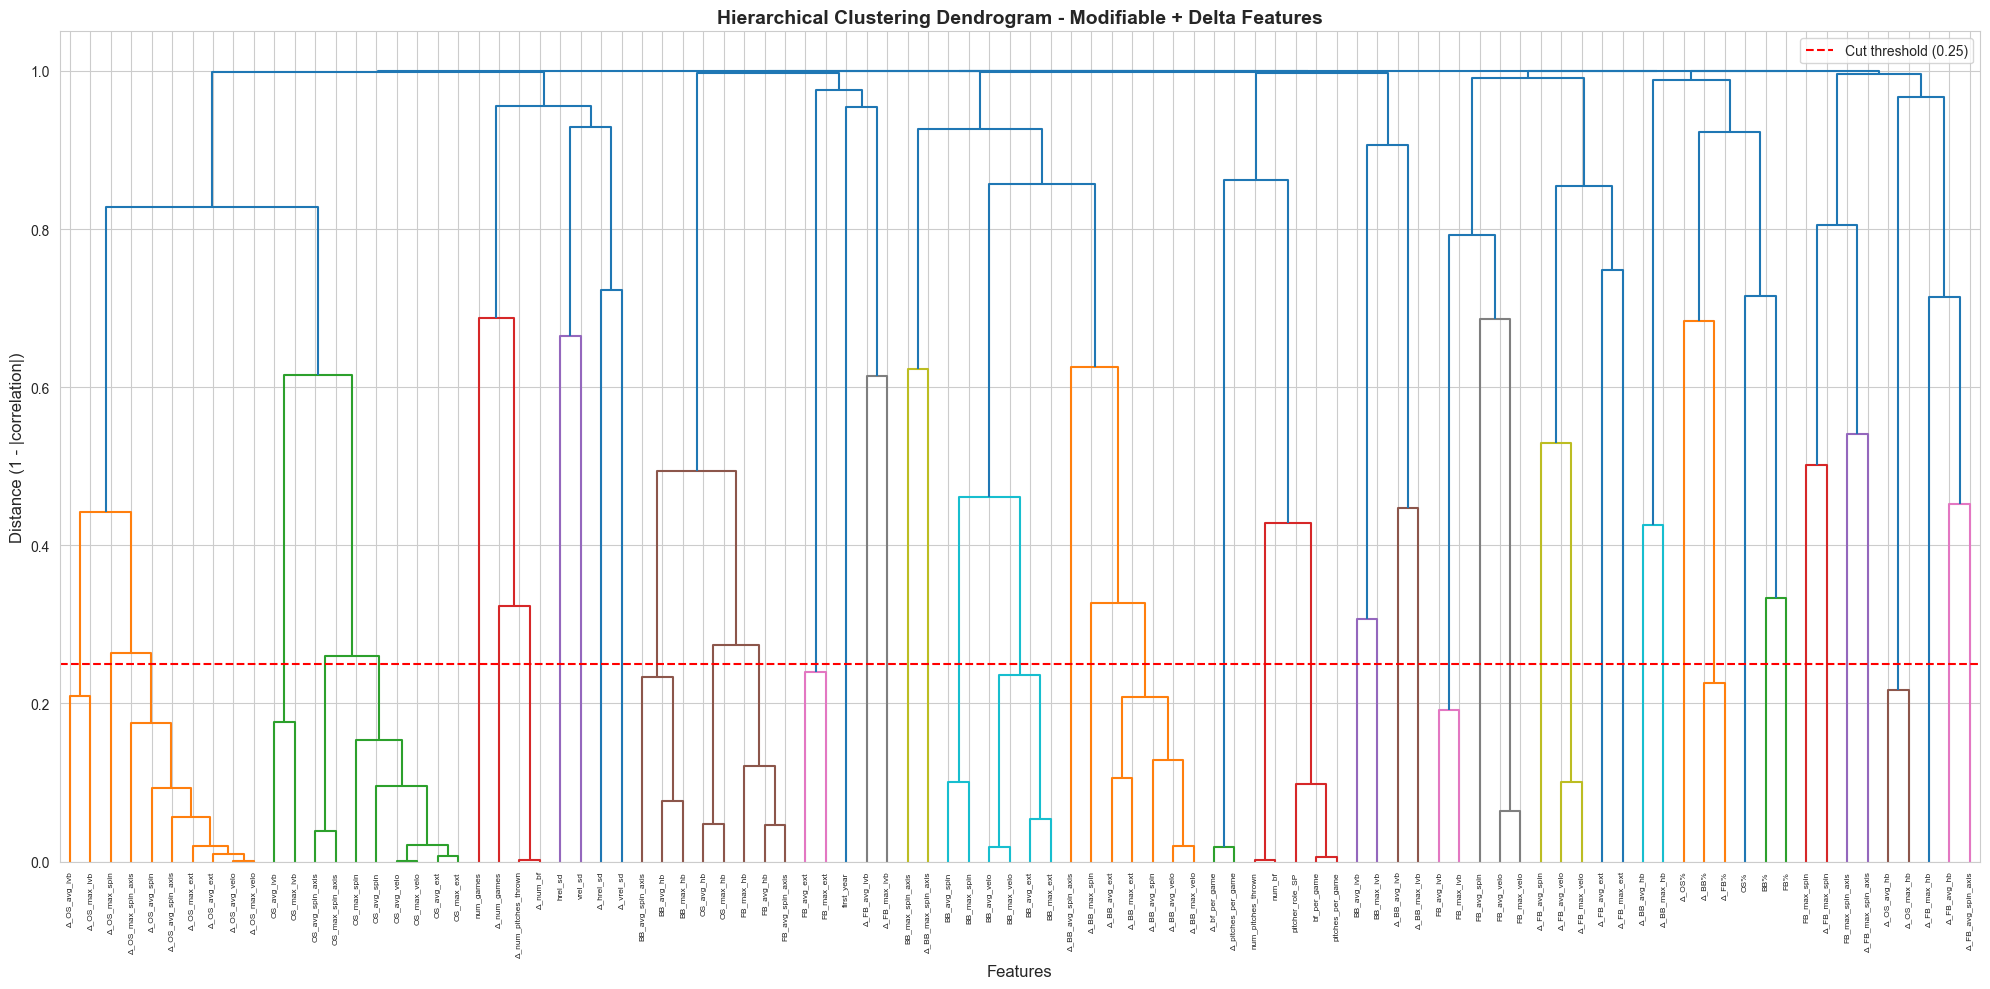


Original modifiable + delta features: 94
Features after clustering: 56

Selected representatives (first 20):
  1. Δ_OS_max_ivb
  2. Δ_OS_max_spin_axis
  3. Δ_OS_max_spin
  4. OS_max_ivb
  5. OS_max_spin_axis
  6. OS_max_spin
  7. Δ_num_bf
  8. Δ_num_games
  9. num_games
  10. hrel_sd
  11. vrel_sd
  12. Δ_hrel_sd
  13. Δ_vrel_sd
  14. BB_max_hb
  15. OS_avg_hb
  16. FB_max_hb
  17. FB_max_ext
  18. Δ_FB_avg_ivb
  19. Δ_FB_max_ivb
  20. first_year
  ... and 36 more


In [35]:
# Perform correlation clustering for modifiable + delta features
print("Clustering modifiable + delta features...")
mod_clusters, mod_linkage, mod_corr = correlation_clustering(
    mod_df, threshold=0.25, method='complete'  # Slightly higher threshold for more features
)

# Visualize dendrogram (may be large, so we'll show a subset or use a different visualization)
plt.figure(figsize=(20, 10))
dendrogram(mod_linkage, labels=mod_df.columns, leaf_rotation=90, leaf_font_size=6)
plt.title('Hierarchical Clustering Dendrogram - Modifiable + Delta Features', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Distance (1 - |correlation|)', fontsize=12)
plt.axhline(y=0.25, color='r', linestyle='--', label='Cut threshold (0.25)')
plt.legend()
plt.tight_layout()
plt.show()

# Select cluster representatives
mod_representatives = select_cluster_representatives(
    mod_df, train_df['injury_next_year'], mod_clusters
)

print(f"\nOriginal modifiable + delta features: {len(mod_features)}")
print(f"Features after clustering: {len(mod_representatives)}")
print(f"\nSelected representatives (first 20):")
for i, rep in enumerate(mod_representatives[:20]):
    print(f"  {i+1}. {rep}")
if len(mod_representatives) > 20:
    print(f"  ... and {len(mod_representatives) - 20} more")


## Step 2: Stability Selection with LASSO


In [36]:
def stability_selection_lasso(X, y, n_bootstrap=100, alpha_range=None, stability_threshold=0.6):
    """
    Perform stability selection with LASSO across bootstrap samples.
    
    Parameters:
    - X: Feature matrix (standardized)
    - y: Target variable
    - n_bootstrap: Number of bootstrap samples
    - alpha_range: Range of regularization parameters to try
    - stability_threshold: Minimum selection frequency to retain feature
    
    Returns:
    - selection_frequencies: Dictionary of feature -> selection frequency
    - selected_features: List of features with frequency >= threshold
    """
    if alpha_range is None:
        # Use a range of alpha values, find best via cross-validation
        from sklearn.linear_model import LogisticRegressionCV
        lr_cv = LogisticRegressionCV(
            Cs=10, penalty='l1', solver='liblinear', cv=5, 
            scoring='neg_log_loss', max_iter=1000
        )
        lr_cv.fit(X, y)
        best_alpha = 1.0 / lr_cv.C_[0]
        alpha_range = [best_alpha * 0.5, best_alpha, best_alpha * 2.0]
    
    selection_counts = {col: 0 for col in X.columns}
    
    print(f"Running stability selection with {n_bootstrap} bootstrap samples...")
    for i in range(n_bootstrap):
        if (i + 1) % 20 == 0:
            print(f"  Completed {i + 1}/{n_bootstrap} samples...")
        
        # Bootstrap sample
        X_boot, y_boot = resample(X, y, random_state=i)
        
        # Try different alpha values
        for alpha in alpha_range:
            lasso = LogisticRegression(
                penalty='l1', C=1.0/alpha, solver='liblinear', 
                max_iter=1000, random_state=42
            )
            lasso.fit(X_boot, y_boot)
            
            # Count selected features (non-zero coefficients)
            selected = X.columns[lasso.coef_[0] != 0]
            for feat in selected:
                selection_counts[feat] += 1
    
    # Convert to frequencies
    selection_frequencies = {k: v / (n_bootstrap * len(alpha_range)) 
                            for k, v in selection_counts.items()}
    
    # Select features above threshold
    selected_features = [feat for feat, freq in selection_frequencies.items() 
                        if freq >= stability_threshold]
    
    return selection_frequencies, selected_features

print("Stability selection function defined!")


Stability selection function defined!


STABILITY SELECTION: Unmodifiable Features
Running stability selection with 50 bootstrap samples...
  Completed 20/50 samples...
  Completed 40/50 samples...


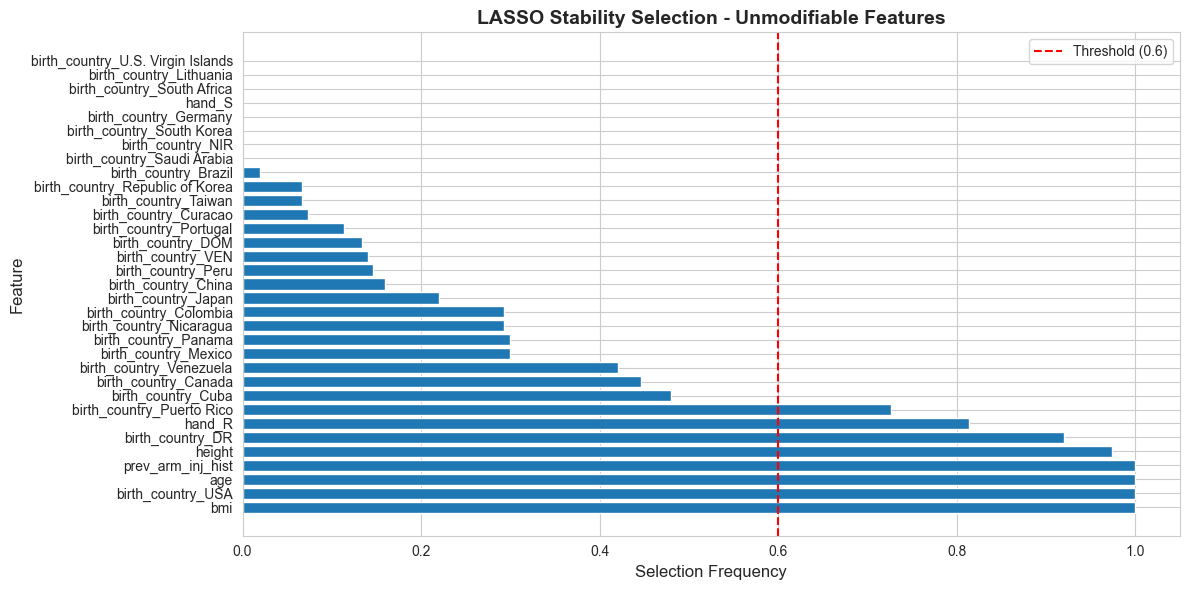


Features selected (frequency >= 0.6): 8
  - bmi: 1.000
  - height: 0.973
  - birth_country_DR: 0.920
  - birth_country_USA: 1.000
  - hand_R: 0.813
  - age: 1.000
  - prev_arm_inj_hist: 1.000
  - birth_country_Puerto Rico: 0.727


In [37]:
# Stability selection for unmodifiable features
print("=" * 60)
print("STABILITY SELECTION: Unmodifiable Features")
print("=" * 60)

X_unmod = unmod_df[unmod_representatives]
y = train_df['injury_next_year'].values

unmod_stability_freq, unmod_stability_selected = stability_selection_lasso(
    X_unmod, y, n_bootstrap=50, stability_threshold=0.6
)

# Visualize selection frequencies
plt.figure(figsize=(12, 6))
freq_df = pd.DataFrame({
    'Feature': list(unmod_stability_freq.keys()),
    'Selection Frequency': list(unmod_stability_freq.values())
}).sort_values('Selection Frequency', ascending=False)

plt.barh(freq_df['Feature'], freq_df['Selection Frequency'])
plt.axvline(x=0.6, color='r', linestyle='--', label='Threshold (0.6)')
plt.xlabel('Selection Frequency', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('LASSO Stability Selection - Unmodifiable Features', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nFeatures selected (frequency >= 0.6): {len(unmod_stability_selected)}")
for feat in unmod_stability_selected:
    print(f"  - {feat}: {unmod_stability_freq[feat]:.3f}")


STABILITY SELECTION: Modifiable + Delta Features
Running stability selection with 50 bootstrap samples...
  Completed 20/50 samples...
  Completed 40/50 samples...


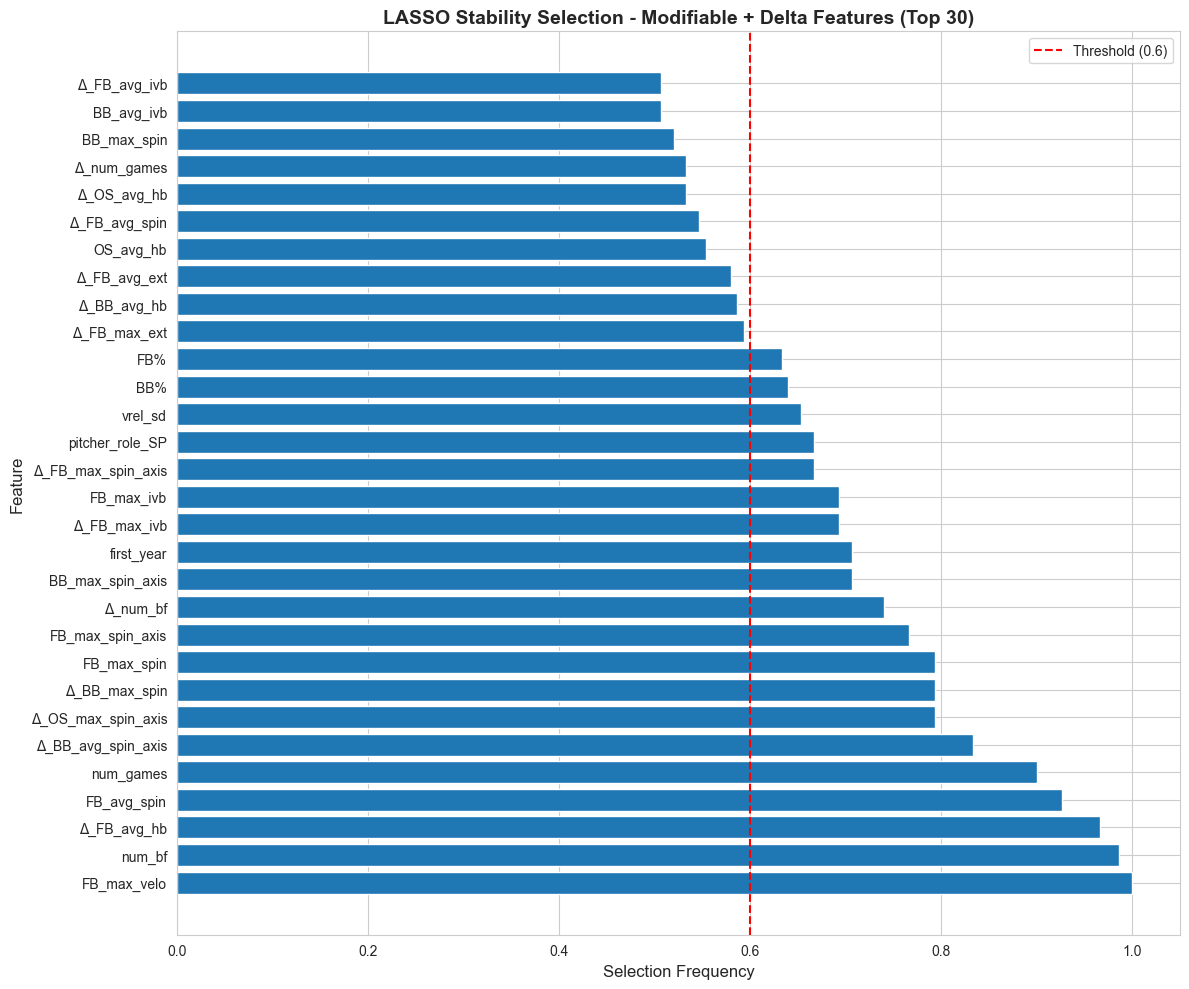


Features selected (frequency >= 0.6): 20

Top 20 selected features:
  1. FB_max_velo: 1.000
  2. num_bf: 0.987
  3. Δ_FB_avg_hb: 0.967
  4. FB_avg_spin: 0.927
  5. num_games: 0.900
  6. Δ_BB_avg_spin_axis: 0.833
  7. Δ_OS_max_spin_axis: 0.793
  8. Δ_BB_max_spin: 0.793
  9. FB_max_spin: 0.793
  10. FB_max_spin_axis: 0.767
  11. Δ_num_bf: 0.740
  12. first_year: 0.707
  13. BB_max_spin_axis: 0.707
  14. Δ_FB_max_ivb: 0.693
  15. FB_max_ivb: 0.693
  16. pitcher_role_SP: 0.667
  17. Δ_FB_max_spin_axis: 0.667
  18. vrel_sd: 0.653
  19. BB%: 0.640
  20. FB%: 0.633


In [38]:
# Stability selection for modifiable + delta features
print("=" * 60)
print("STABILITY SELECTION: Modifiable + Delta Features")
print("=" * 60)

X_mod = mod_df[mod_representatives]
y = train_df['injury_next_year'].values

mod_stability_freq, mod_stability_selected = stability_selection_lasso(
    X_mod, y, n_bootstrap=50, stability_threshold=0.6
)

# Visualize selection frequencies (top 30)
plt.figure(figsize=(12, 10))
freq_df = pd.DataFrame({
    'Feature': list(mod_stability_freq.keys()),
    'Selection Frequency': list(mod_stability_freq.values())
}).sort_values('Selection Frequency', ascending=False).head(30)

plt.barh(freq_df['Feature'], freq_df['Selection Frequency'])
plt.axvline(x=0.6, color='r', linestyle='--', label='Threshold (0.6)')
plt.xlabel('Selection Frequency', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('LASSO Stability Selection - Modifiable + Delta Features (Top 30)', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nFeatures selected (frequency >= 0.6): {len(mod_stability_selected)}")
print("\nTop 20 selected features:")
for i, feat in enumerate(sorted(mod_stability_selected, 
                                key=lambda x: mod_stability_freq[x], 
                                reverse=True)[:20]):
    print(f"  {i+1}. {feat}: {mod_stability_freq[feat]:.3f}")
if len(mod_stability_selected) > 20:
    print(f"  ... and {len(mod_stability_selected) - 20} more")


## Step 3: Permutation Importance with XGBoost


In [39]:
def xgboost_permutation_importance(X, y, n_repeats=10, random_state=42):
    """
    Compute permutation importance using XGBoost.
    
    Parameters:
    - X: Feature matrix
    - y: Target variable
    - n_repeats: Number of times to permute each feature
    - random_state: Random seed
    
    Returns:
    - importance_dict: Dictionary of feature -> importance score
    """
    # Train XGBoost model
    xgb_model = XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        random_state=random_state,
        eval_metric='logloss',
        use_label_encoder=False
    )
    
    xgb_model.fit(X, y)
    
    # Compute permutation importance
    perm_importance = permutation_importance(
        xgb_model, X, y, 
        n_repeats=n_repeats, 
        random_state=random_state,
        scoring='neg_log_loss'
    )
    
    # Create dictionary
    importance_dict = {
        feature: perm_importance.importances_mean[i] 
        for i, feature in enumerate(X.columns)
    }
    
    return importance_dict, xgb_model

print("XGBoost permutation importance function defined!")


XGBoost permutation importance function defined!


PERMUTATION IMPORTANCE: Unmodifiable Features


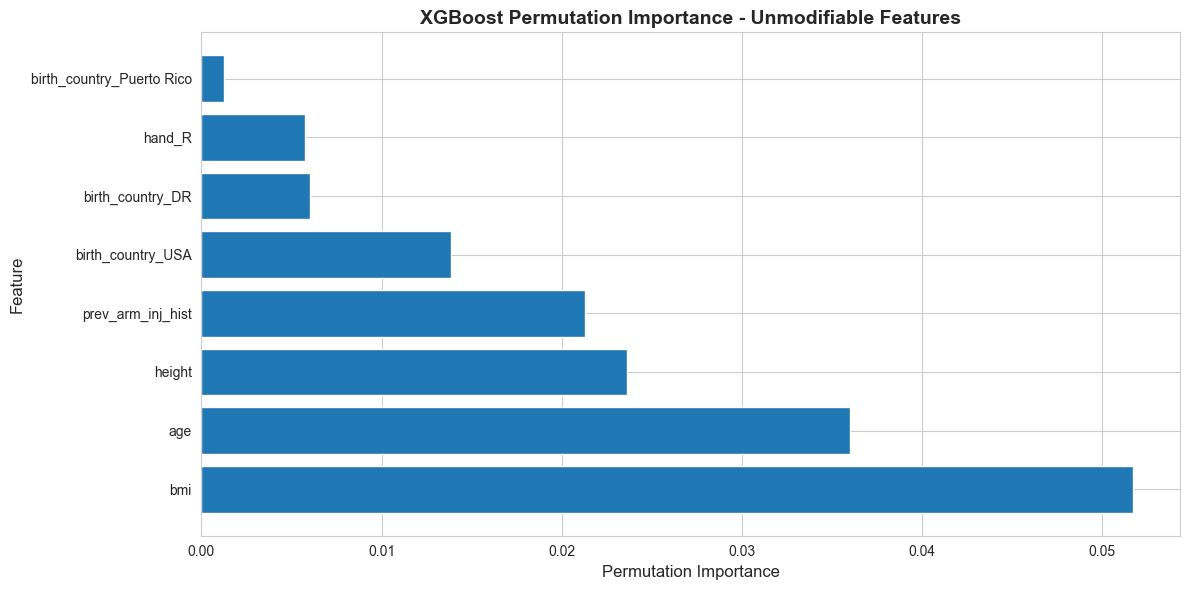


Top features by permutation importance:
  1. bmi: 0.0517
  2. age: 0.0360
  3. height: 0.0236
  4. prev_arm_inj_hist: 0.0213
  5. birth_country_USA: 0.0139
  6. birth_country_DR: 0.0060
  7. hand_R: 0.0058
  8. birth_country_Puerto Rico: 0.0013


In [40]:
# Permutation importance for unmodifiable features
print("=" * 60)
print("PERMUTATION IMPORTANCE: Unmodifiable Features")
print("=" * 60)

X_unmod_perm = unmod_df[unmod_stability_selected] if len(unmod_stability_selected) > 0 else unmod_df[unmod_representatives]
y = train_df['injury_next_year'].values

unmod_perm_importance, unmod_xgb = xgboost_permutation_importance(
    X_unmod_perm, y, n_repeats=10
)

# Visualize permutation importance
plt.figure(figsize=(12, 6))
importance_df = pd.DataFrame({
    'Feature': list(unmod_perm_importance.keys()),
    'Importance': list(unmod_perm_importance.values())
}).sort_values('Importance', ascending=False)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Permutation Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('XGBoost Permutation Importance - Unmodifiable Features', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop features by permutation importance:")
for i, (feat, imp) in enumerate(sorted(unmod_perm_importance.items(), 
                                      key=lambda x: x[1], 
                                      reverse=True)[:10]):
    print(f"  {i+1}. {feat}: {imp:.4f}")


PERMUTATION IMPORTANCE: Modifiable + Delta Features


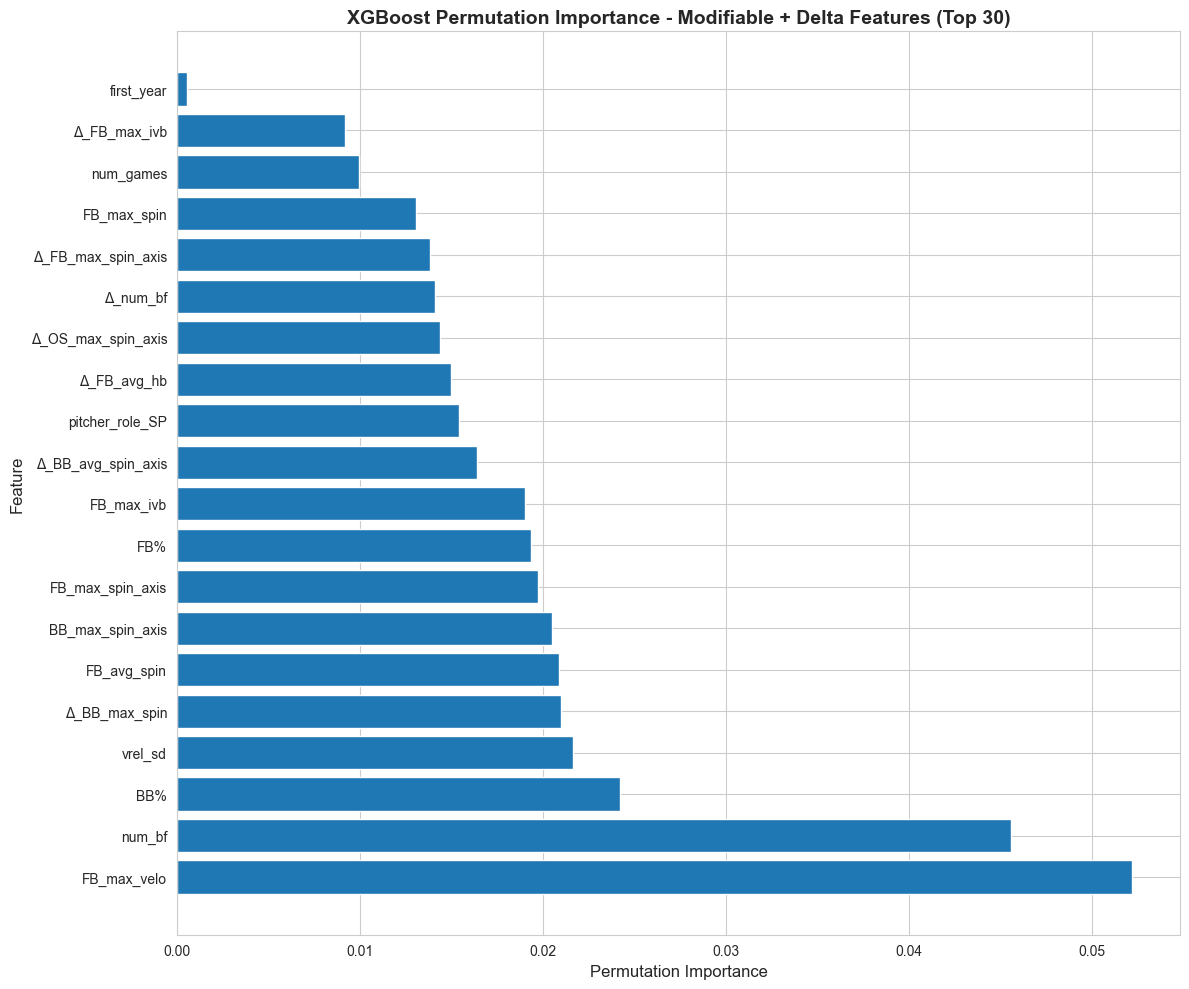


Top 20 features by permutation importance:
  1. FB_max_velo: 0.0522
  2. num_bf: 0.0456
  3. BB%: 0.0242
  4. vrel_sd: 0.0217
  5. Δ_BB_max_spin: 0.0210
  6. FB_avg_spin: 0.0209
  7. BB_max_spin_axis: 0.0205
  8. FB_max_spin_axis: 0.0197
  9. FB%: 0.0193
  10. FB_max_ivb: 0.0190
  11. Δ_BB_avg_spin_axis: 0.0164
  12. pitcher_role_SP: 0.0154
  13. Δ_FB_avg_hb: 0.0150
  14. Δ_OS_max_spin_axis: 0.0144
  15. Δ_num_bf: 0.0141
  16. Δ_FB_max_spin_axis: 0.0138
  17. FB_max_spin: 0.0131
  18. num_games: 0.0099
  19. Δ_FB_max_ivb: 0.0092
  20. first_year: 0.0005


In [41]:
# Permutation importance for modifiable + delta features
print("=" * 60)
print("PERMUTATION IMPORTANCE: Modifiable + Delta Features")
print("=" * 60)

X_mod_perm = mod_df[mod_stability_selected] if len(mod_stability_selected) > 0 else mod_df[mod_representatives]
y = train_df['injury_next_year'].values

mod_perm_importance, mod_xgb = xgboost_permutation_importance(
    X_mod_perm, y, n_repeats=10
)

# Visualize permutation importance (top 30)
plt.figure(figsize=(12, 10))
importance_df = pd.DataFrame({
    'Feature': list(mod_perm_importance.keys()),
    'Importance': list(mod_perm_importance.values())
}).sort_values('Importance', ascending=False).head(30)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Permutation Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('XGBoost Permutation Importance - Modifiable + Delta Features (Top 30)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop 20 features by permutation importance:")
for i, (feat, imp) in enumerate(sorted(mod_perm_importance.items(), 
                                      key=lambda x: x[1], 
                                      reverse=True)[:20]):
    print(f"  {i+1}. {feat}: {imp:.4f}")


## Step 4: Finalize Feature Sets


In [42]:
def finalize_features(cluster_reps, stability_selected, perm_importance, 
                     stability_freq_dict=None, perm_top_n=None, min_methods=2):
    """
    Combine results from clustering, LASSO stability, and permutation importance.
    
    Parameters:
    - cluster_reps: Features selected from clustering
    - stability_selected: List of features selected by LASSO stability
    - perm_importance: Dictionary of permutation importance scores
    - stability_freq_dict: Dictionary of feature -> stability frequency (optional)
    - perm_top_n: Number of top features by permutation importance to consider
    - min_methods: Minimum number of methods that must select a feature
    
    Returns:
    - final_features: List of finalized features
    - selection_summary: DataFrame with selection details
    """
    # Determine top features by permutation importance
    if perm_top_n is None:
        # Use features with positive importance
        perm_selected = [f for f, imp in perm_importance.items() if imp > 0]
    else:
        perm_selected = sorted(perm_importance.items(), key=lambda x: x[1], reverse=True)[:perm_top_n]
        perm_selected = [f for f, _ in perm_selected]
    
    # Get all candidate features
    all_candidates = set(cluster_reps) | set(stability_selected) | set(perm_selected)
    
    # Score each feature
    selection_scores = []
    for feat in all_candidates:
        in_cluster = 1 if feat in cluster_reps else 0
        in_stability = 1 if feat in stability_selected else 0
        in_perm = 1 if feat in perm_selected else 0
        
        # Get stability frequency if available
        if stability_freq_dict is not None:
            stability_freq = stability_freq_dict.get(feat, 0)
        else:
            stability_freq = 0
        
        # Get permutation importance if available
        perm_imp = perm_importance.get(feat, 0)
        
        # Count methods
        method_count = in_cluster + in_stability + in_perm
        
        # Combined score
        score = (method_count * 10 + 
                stability_freq * 5 +
                perm_imp * 100)
        
        selection_scores.append({
            'feature': feat,
            'in_cluster': in_cluster,
            'in_stability': in_stability,
            'in_perm': in_perm,
            'method_count': method_count,
            'stability_freq': stability_freq,
            'perm_importance': perm_imp,
            'combined_score': score
        })
    
    selection_df = pd.DataFrame(selection_scores)
    
    # Select features that appear in at least min_methods methods
    final_features = selection_df[selection_df['method_count'] >= min_methods]['feature'].tolist()
    
    # If too few features, also include top-scoring features
    if len(final_features) < 5:
        # Include top 10 by combined score
        top_features = selection_df.nlargest(10, 'combined_score')['feature'].tolist()
        final_features = list(set(final_features + top_features))
    
    return final_features, selection_df

print("Feature finalization function defined!")


Feature finalization function defined!


In [43]:
# Finalize unmodifiable features
print("=" * 60)
print("FINALIZING: Unmodifiable Features")
print("=" * 60)

unmod_final, unmod_summary = finalize_features(
    unmod_representatives,
    unmod_stability_selected,
    unmod_perm_importance,
    stability_freq_dict=unmod_stability_freq,
    min_methods=1  # More lenient for unmodifiable (fewer features)
)

print(f"\nFinal unmodifiable features ({len(unmod_final)}):")
for feat in sorted(unmod_final):
    print(f"  - {feat}")

# Display summary
print("\nSelection Summary:")
print(unmod_summary.sort_values('combined_score', ascending=False).to_string(index=False))


FINALIZING: Unmodifiable Features

Final unmodifiable features (33):
  - age
  - birth_country_Brazil
  - birth_country_Canada
  - birth_country_China
  - birth_country_Colombia
  - birth_country_Cuba
  - birth_country_Curacao
  - birth_country_DOM
  - birth_country_DR
  - birth_country_Germany
  - birth_country_Japan
  - birth_country_Lithuania
  - birth_country_Mexico
  - birth_country_NIR
  - birth_country_Nicaragua
  - birth_country_Panama
  - birth_country_Peru
  - birth_country_Portugal
  - birth_country_Puerto Rico
  - birth_country_Republic of Korea
  - birth_country_Saudi Arabia
  - birth_country_South Africa
  - birth_country_South Korea
  - birth_country_Taiwan
  - birth_country_U.S. Virgin Islands
  - birth_country_USA
  - birth_country_VEN
  - birth_country_Venezuela
  - bmi
  - hand_R
  - hand_S
  - height
  - prev_arm_inj_hist

Selection Summary:
                          feature  in_cluster  in_stability  in_perm  method_count  stability_freq  perm_importance  combined_

In [44]:
# Finalize modifiable + delta features
print("=" * 60)
print("FINALIZING: Modifiable + Delta Features")
print("=" * 60)

mod_final, mod_summary = finalize_features(
    mod_representatives,
    mod_stability_selected,
    mod_perm_importance,
    stability_freq_dict=mod_stability_freq,
    perm_top_n=50,  # Consider top 50 by permutation importance
    min_methods=2   # Require at least 2 methods to agree
)

print(f"\nFinal modifiable + delta features ({len(mod_final)}):")
for i, feat in enumerate(sorted(mod_final), 1):
    print(f"  {i}. {feat}")

# Display top 30 summary
print("\nTop 30 Features by Combined Score:")
print(mod_summary.nlargest(30, 'combined_score')[['feature', 'method_count', 
                                                   'stability_freq', 'perm_importance', 
                                                   'combined_score']].to_string(index=False))


FINALIZING: Modifiable + Delta Features

Final modifiable + delta features (20):
  1. BB%
  2. BB_max_spin_axis
  3. FB%
  4. FB_avg_spin
  5. FB_max_ivb
  6. FB_max_spin
  7. FB_max_spin_axis
  8. FB_max_velo
  9. first_year
  10. num_bf
  11. num_games
  12. pitcher_role_SP
  13. vrel_sd
  14. Δ_BB_avg_spin_axis
  15. Δ_BB_max_spin
  16. Δ_FB_avg_hb
  17. Δ_FB_max_ivb
  18. Δ_FB_max_spin_axis
  19. Δ_OS_max_spin_axis
  20. Δ_num_bf

Top 30 Features by Combined Score:
           feature  method_count  stability_freq  perm_importance  combined_score
       FB_max_velo             3        1.000000         0.052190       40.219031
            num_bf             3        0.986667         0.045563       39.489644
       FB_avg_spin             3        0.926667         0.020868       36.720183
       Δ_FB_avg_hb             3        0.966667         0.014994       36.332705
     Δ_BB_max_spin             3        0.793333         0.020972       36.063853
Δ_BB_avg_spin_axis             3  

## Step 5: Visualize Final Feature Selection Results


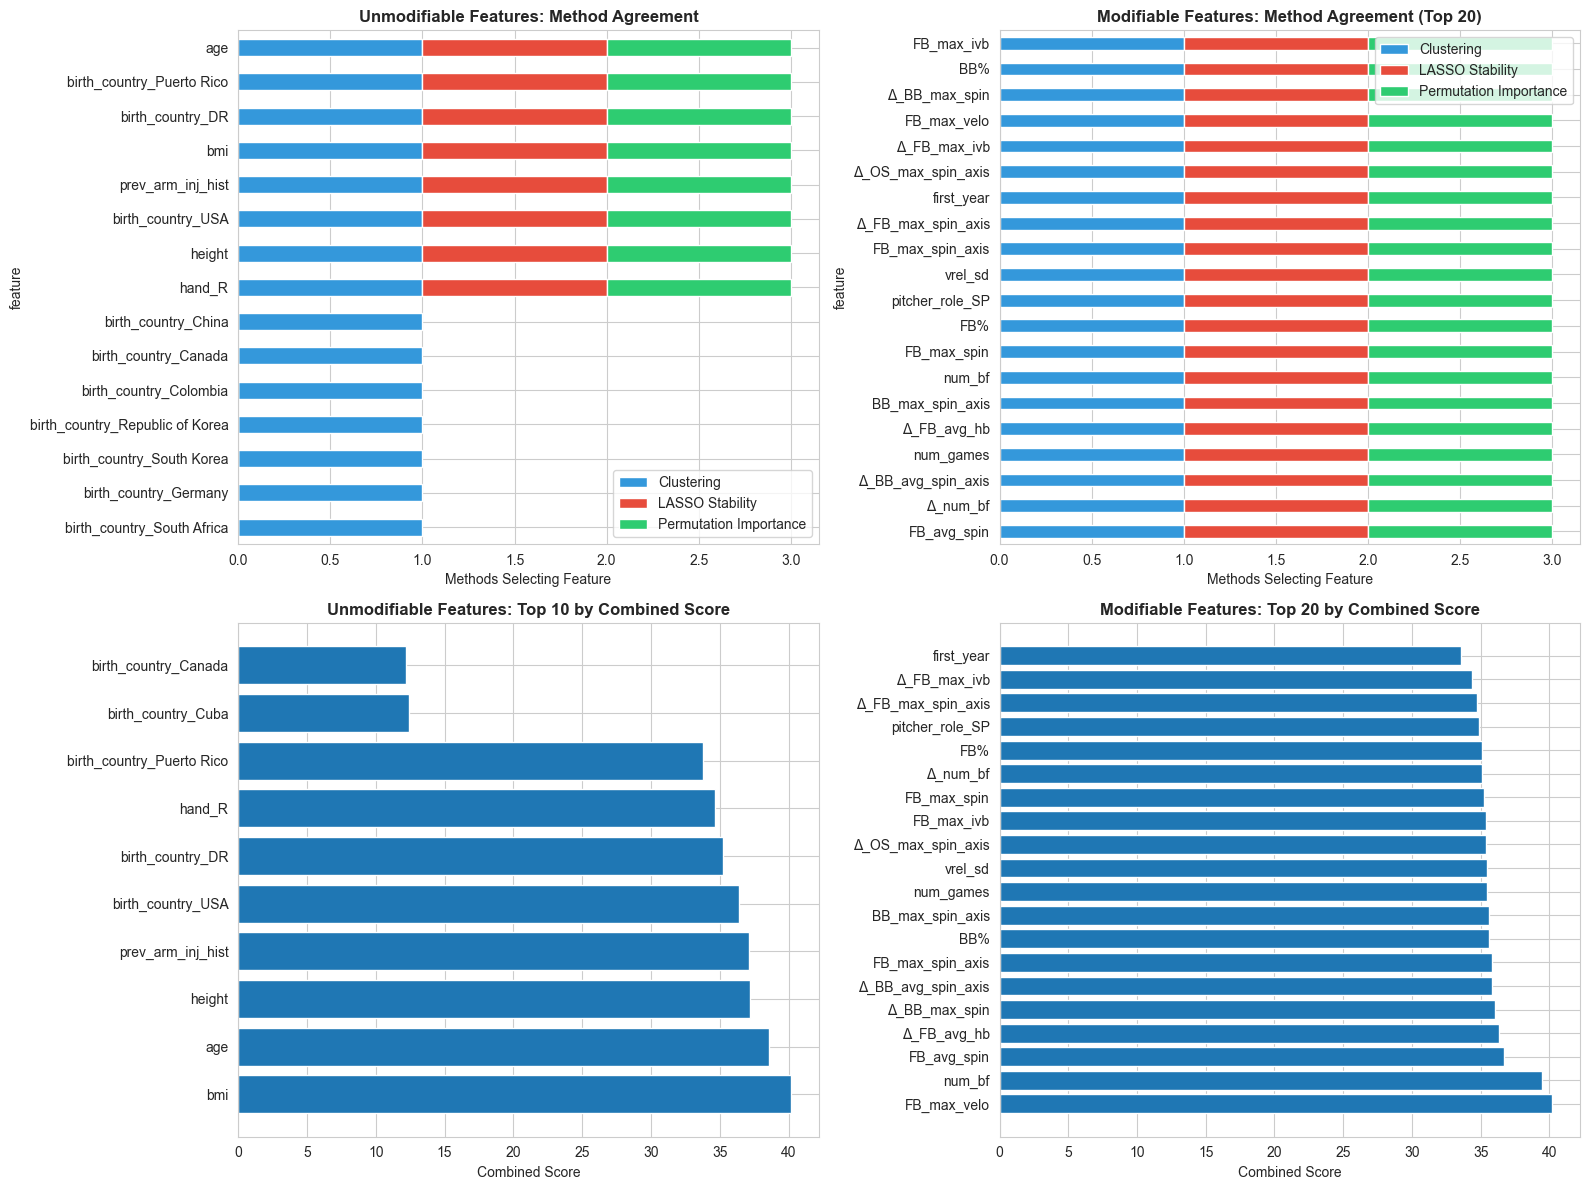

In [45]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Unmodifiable: Method agreement
ax1 = axes[0, 0]
unmod_methods = unmod_summary[['feature', 'in_cluster', 'in_stability', 'in_perm']].copy()
unmod_methods['total_methods'] = (unmod_methods['in_cluster'] + 
                                   unmod_methods['in_stability'] + 
                                   unmod_methods['in_perm'])
unmod_methods = unmod_methods.sort_values('total_methods', ascending=True).tail(15)
unmod_methods.set_index('feature', inplace=True)
unmod_methods[['in_cluster', 'in_stability', 'in_perm']].plot(
    kind='barh', stacked=True, ax=ax1, 
    color=['#3498db', '#e74c3c', '#2ecc71']
)
ax1.set_title('Unmodifiable Features: Method Agreement', fontweight='bold')
ax1.set_xlabel('Methods Selecting Feature')
ax1.legend(['Clustering', 'LASSO Stability', 'Permutation Importance'])

# 2. Modifiable: Method agreement (top 20)
ax2 = axes[0, 1]
mod_methods = mod_summary[['feature', 'in_cluster', 'in_stability', 'in_perm']].copy()
mod_methods['total_methods'] = (mod_methods['in_cluster'] + 
                                 mod_methods['in_stability'] + 
                                 mod_methods['in_perm'])
mod_methods = mod_methods.sort_values('total_methods', ascending=True).tail(20)
mod_methods.set_index('feature', inplace=True)
mod_methods[['in_cluster', 'in_stability', 'in_perm']].plot(
    kind='barh', stacked=True, ax=ax2,
    color=['#3498db', '#e74c3c', '#2ecc71']
)
ax2.set_title('Modifiable Features: Method Agreement (Top 20)', fontweight='bold')
ax2.set_xlabel('Methods Selecting Feature')
ax2.legend(['Clustering', 'LASSO Stability', 'Permutation Importance'])

# 3. Unmodifiable: Combined scores
ax3 = axes[1, 0]
unmod_top = unmod_summary.nlargest(10, 'combined_score')
ax3.barh(unmod_top['feature'], unmod_top['combined_score'])
ax3.set_title('Unmodifiable Features: Top 10 by Combined Score', fontweight='bold')
ax3.set_xlabel('Combined Score')

# 4. Modifiable: Combined scores (top 20)
ax4 = axes[1, 1]
mod_top = mod_summary.nlargest(20, 'combined_score')
ax4.barh(mod_top['feature'], mod_top['combined_score'])
ax4.set_title('Modifiable Features: Top 20 by Combined Score', fontweight='bold')
ax4.set_xlabel('Combined Score')

plt.tight_layout()
plt.show()


## Step 6: Save Selected Features


In [46]:
# Map back to original feature names (handle one-hot encoded features)
def map_to_original_features(selected_features, original_feature_list):
    """
    Map selected features back to original feature names.
    Handles one-hot encoded categorical variables.
    """
    original_selected = []
    
    for feat in selected_features:
        # Check if it's a one-hot encoded feature
        if any(feat.startswith(orig + '_') for orig in original_feature_list):
            # Extract base feature name
            for orig in original_feature_list:
                if feat.startswith(orig + '_'):
                    if orig not in original_selected:
                        original_selected.append(orig)
                    break
        elif feat in original_feature_list:
            original_selected.append(feat)
        else:
            # Keep as is (might be a transformed feature)
            original_selected.append(feat)
    
    return list(set(original_selected))

# Map unmodifiable features
unmod_final_original = map_to_original_features(unmod_final, unmodifiable_features)

# Map modifiable features (need to handle both modifiable and delta)
all_mod_features = modifiable_features + delta_features
mod_final_original = map_to_original_features(mod_final, all_mod_features)

# Create final feature sets for each model variant
variant1_features = unmod_final_original.copy()  # Unmodifiable only
variant2_features = mod_final_original.copy()    # Modifiable + delta only
variant3_features = unmod_final_original + mod_final_original  # All features

# Ensure 'game_year' is included for all variants (needed for year term)
variant1_features.append('game_year')
variant2_features.append('game_year')
variant3_features.append('game_year')

# Remove duplicates
variant1_features = list(set(variant1_features))
variant2_features = list(set(variant2_features))
variant3_features = list(set(variant3_features))

print("=" * 60)
print("FINAL FEATURE SETS")
print("=" * 60)
print(f"\nVariant 1 (Unmodifiable only): {len(variant1_features)} features")
print(f"Variant 2 (Modifiable + Delta): {len(variant2_features)} features")
print(f"Variant 3 (All features): {len(variant3_features)} features")

# Save to dictionaries for easy access
feature_selection_results = {
    'variant1_unmodifiable': variant1_features,
    'variant2_modifiable': variant2_features,
    'variant3_all': variant3_features,
    'unmodifiable_cluster_reps': unmod_representatives,
    'modifiable_cluster_reps': mod_representatives,
    'unmodifiable_stability_selected': unmod_stability_selected,
    'modifiable_stability_selected': mod_stability_selected,
    'unmodifiable_perm_top': sorted(unmod_perm_importance.items(), 
                                    key=lambda x: x[1], reverse=True)[:10],
    'modifiable_perm_top': sorted(mod_perm_importance.items(), 
                                  key=lambda x: x[1], reverse=True)[:20],
    'unmodifiable_summary': unmod_summary,
    'modifiable_summary': mod_summary
}

# Print feature lists
print("\n" + "=" * 60)
print("VARIANT 1 FEATURES (Unmodifiable only):")
print("=" * 60)
for i, feat in enumerate(sorted(variant1_features), 1):
    print(f"{i}. {feat}")

print("\n" + "=" * 60)
print("VARIANT 2 FEATURES (Modifiable + Delta):")
print("=" * 60)
for i, feat in enumerate(sorted(variant2_features), 1):
    print(f"{i}. {feat}")

print("\n" + "=" * 60)
print("VARIANT 3 FEATURES (All):")
print("=" * 60)
print(f"Total: {len(variant3_features)} features")
print("(Combination of Variant 1 + Variant 2)")

# Save results to a pickle file for later use
import pickle
with open('feature_selection_results.pkl', 'wb') as f:
    pickle.dump(feature_selection_results, f)

print("\n✓ Feature selection results saved to 'feature_selection_results.pkl'")


FINAL FEATURE SETS

Variant 1 (Unmodifiable only): 7 features
Variant 2 (Modifiable + Delta): 20 features
Variant 3 (All features): 26 features

VARIANT 1 FEATURES (Unmodifiable only):
1. age
2. birth_country
3. bmi
4. game_year
5. hand
6. height
7. prev_arm_inj_hist

VARIANT 2 FEATURES (Modifiable + Delta):
1. BB%
2. BB_max_spin
3. FB%
4. FB_avg_spin
5. FB_max_ivb
6. FB_max_spin
7. FB_max_velo
8. first_year
9. game_year
10. num_bf
11. num_games
12. pitcher_role
13. vrel_sd
14. Δ_BB_avg_spin
15. Δ_BB_max_spin
16. Δ_FB_avg_hb
17. Δ_FB_max_ivb
18. Δ_FB_max_spin
19. Δ_OS_max_spin
20. Δ_num_bf

VARIANT 3 FEATURES (All):
Total: 26 features
(Combination of Variant 1 + Variant 2)

✓ Feature selection results saved to 'feature_selection_results.pkl'


## Step 7: Final Correlation Matrices for Selected Features


In [47]:
# Prepare data for correlation matrices
def prepare_features_for_correlation(df, feature_list):
    """
    Prepare features for correlation analysis.
    Handles categorical variables by one-hot encoding (for game_year and other categoricals).
    """
    # Filter to available features
    available_features = [f for f in feature_list if f in df.columns]
    feature_df = df[available_features].copy()
    
    # Separate categorical and numerical features
    categorical_features = []
    numerical_features = []
    
    for col in feature_df.columns:
        if feature_df[col].dtype == 'object' or feature_df[col].dtype.name == 'category':
            categorical_features.append(col)
        else:
            numerical_features.append(col)
    
    # One-hot encode categorical features (including game_year as string)
    if categorical_features:
        feature_df = pd.get_dummies(feature_df, columns=categorical_features, drop_first=True)
    
    # Fill missing values with median for numerical features
    for col in feature_df.columns:
        if feature_df[col].dtype in ['float64', 'int64']:
            feature_df[col] = feature_df[col].fillna(feature_df[col].median())
        else:
            feature_df[col] = feature_df[col].fillna(0)
    
    return feature_df

print("=" * 60)
print("FINAL CORRELATION MATRICES")
print("=" * 60)

# Prepare data for each variant
train_variant1 = prepare_features_for_correlation(train_df, variant1_features)
train_variant2 = prepare_features_for_correlation(train_df, variant2_features)
train_variant3 = prepare_features_for_correlation(train_df, variant3_features)

# Compute correlation matrices
corr_variant1 = train_variant1.corr()
corr_variant2 = train_variant2.corr()
corr_variant3 = train_variant3.corr()

print(f"\nVariant 1 correlation matrix shape: {corr_variant1.shape}")
print(f"Variant 2 correlation matrix shape: {corr_variant2.shape}")
print(f"Variant 3 correlation matrix shape: {corr_variant3.shape}")


FINAL CORRELATION MATRICES

Variant 1 correlation matrix shape: (38, 38)
Variant 2 correlation matrix shape: (24, 24)
Variant 3 correlation matrix shape: (57, 57)


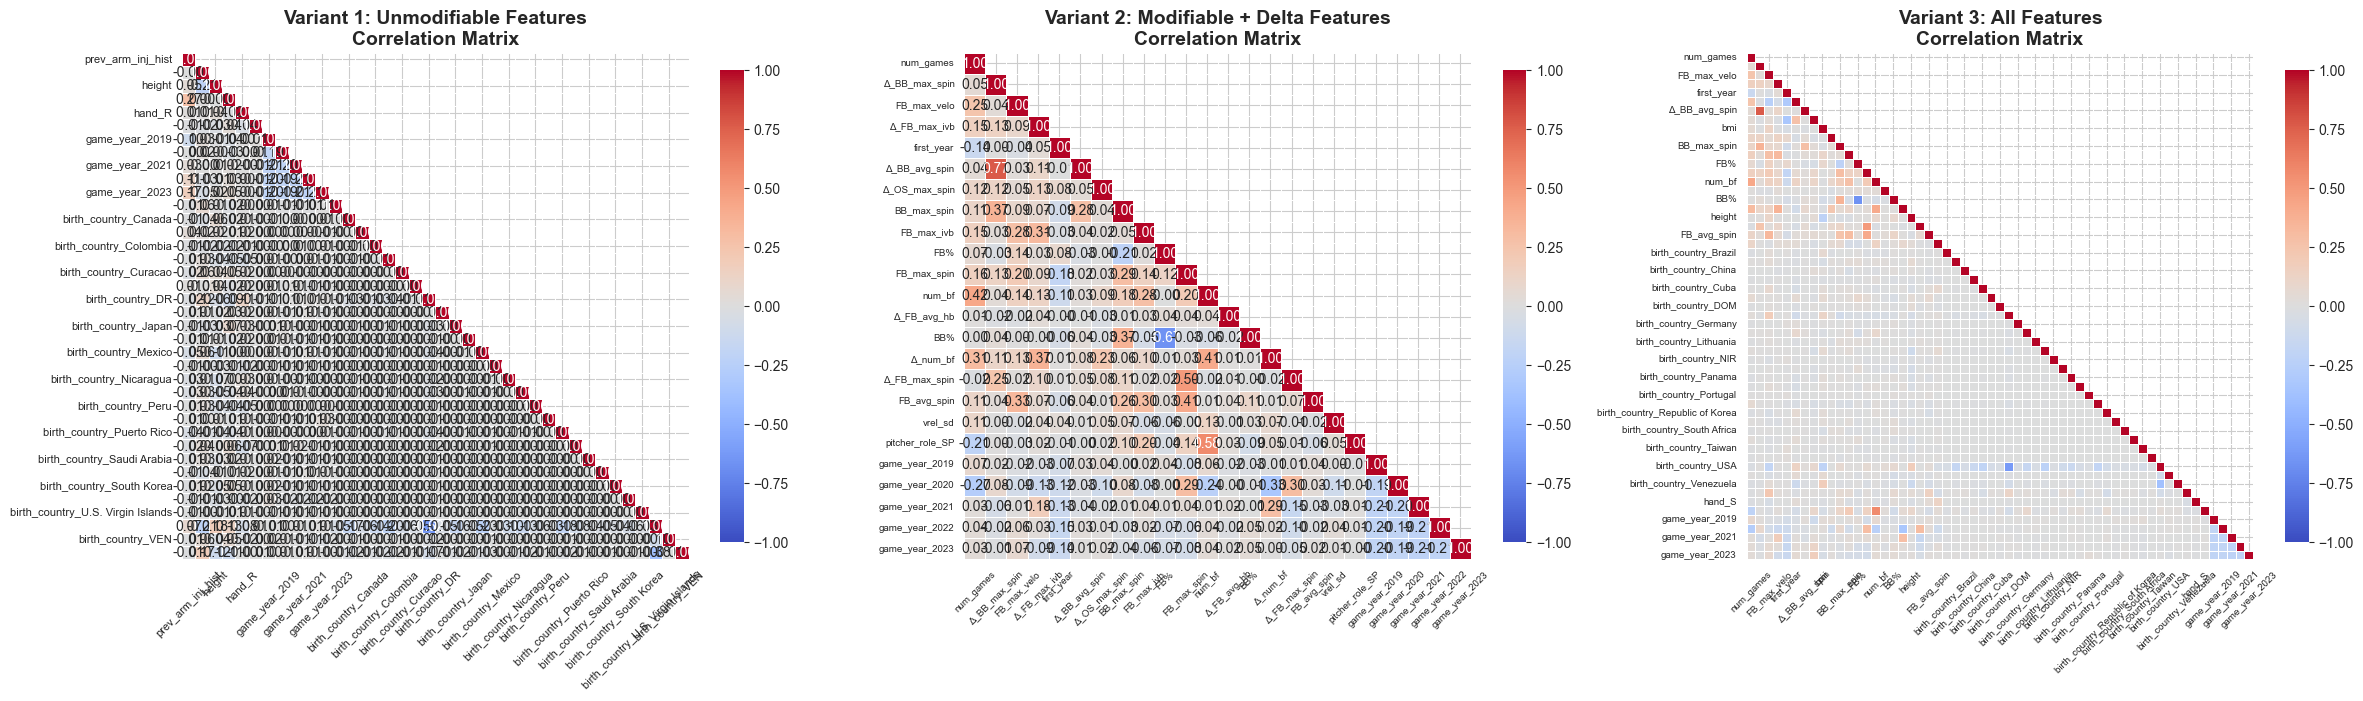

In [48]:
# Visualize correlation matrices
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# Variant 1: Unmodifiable features
ax1 = axes[0]
mask1 = np.triu(np.ones_like(corr_variant1, dtype=bool), k=1)
sns.heatmap(corr_variant1, mask=mask1, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            ax=ax1, vmin=-1, vmax=1)
ax1.set_title('Variant 1: Unmodifiable Features\nCorrelation Matrix', 
              fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=8)
ax1.tick_params(axis='y', rotation=0, labelsize=8)

# Variant 2: Modifiable + Delta features
ax2 = axes[1]
mask2 = np.triu(np.ones_like(corr_variant2, dtype=bool), k=1)
# For larger matrices, only annotate if not too many features
annot_v2 = corr_variant2.shape[0] <= 25
sns.heatmap(corr_variant2, mask=mask2, annot=annot_v2, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            ax=ax2, vmin=-1, vmax=1)
ax2.set_title('Variant 2: Modifiable + Delta Features\nCorrelation Matrix', 
              fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=7)
ax2.tick_params(axis='y', rotation=0, labelsize=7)

# Variant 3: All features
ax3 = axes[2]
mask3 = np.triu(np.ones_like(corr_variant3, dtype=bool), k=1)
# For larger matrices, only annotate if not too many features
annot_v3 = corr_variant3.shape[0] <= 30
sns.heatmap(corr_variant3, mask=mask3, annot=annot_v3, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            ax=ax3, vmin=-1, vmax=1)
ax3.set_title('Variant 3: All Features\nCorrelation Matrix', 
              fontsize=14, fontweight='bold')
ax3.tick_params(axis='x', rotation=45, labelsize=7)
ax3.tick_params(axis='y', rotation=0, labelsize=7)

plt.tight_layout()
plt.show()


In [49]:
# Identify high correlations (potential multicollinearity issues)
def find_high_correlations(corr_matrix, threshold=0.2):
    """
    Find pairs of features with correlation above threshold.
    """
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) >= threshold:
                high_corr_pairs.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_val
                })
    return pd.DataFrame(high_corr_pairs)

print("=" * 60)
print("HIGH CORRELATION PAIRS (|r| >= 0.5)")
print("=" * 60)

# Check each variant
high_corr_v1 = find_high_correlations(corr_variant1, threshold=0.2)
high_corr_v2 = find_high_correlations(corr_variant2, threshold=0.2)
high_corr_v3 = find_high_correlations(corr_variant3, threshold=0.2)

print(f"\nVariant 1: {len(high_corr_v1)} high correlation pairs")
if len(high_corr_v1) > 0:
    print(high_corr_v1.to_string(index=False))
else:
    print("  ✓ No high correlations found")

print(f"\nVariant 2: {len(high_corr_v2)} high correlation pairs")
if len(high_corr_v2) > 0:
    print(high_corr_v2.to_string(index=False))
else:
    print("  ✓ No high correlations found")

print(f"\nVariant 3: {len(high_corr_v3)} high correlation pairs")
if len(high_corr_v3) > 0:
    print(high_corr_v3.to_string(index=False))
else:
    print("  ✓ No high correlations found")


HIGH CORRELATION PAIRS (|r| >= 0.5)

Variant 1: 13 high correlation pairs
            feature1                feature2  correlation
   prev_arm_inj_hist                     age     0.269688
                 bmi                  height    -0.212038
                 bmi       birth_country_USA    -0.207556
      game_year_2019          game_year_2021    -0.208909
      game_year_2019          game_year_2022    -0.202421
      game_year_2019          game_year_2023    -0.202118
      game_year_2021          game_year_2022    -0.213894
      game_year_2021          game_year_2023    -0.213573
      game_year_2022          game_year_2023    -0.206941
  birth_country_Cuba       birth_country_USA    -0.203035
    birth_country_DR       birth_country_USA    -0.622956
birth_country_Mexico       birth_country_USA    -0.225823
   birth_country_USA birth_country_Venezuela    -0.379357

Variant 2: 37 high correlation pairs
      feature1        feature2  correlation
     num_games     FB_max_velo  

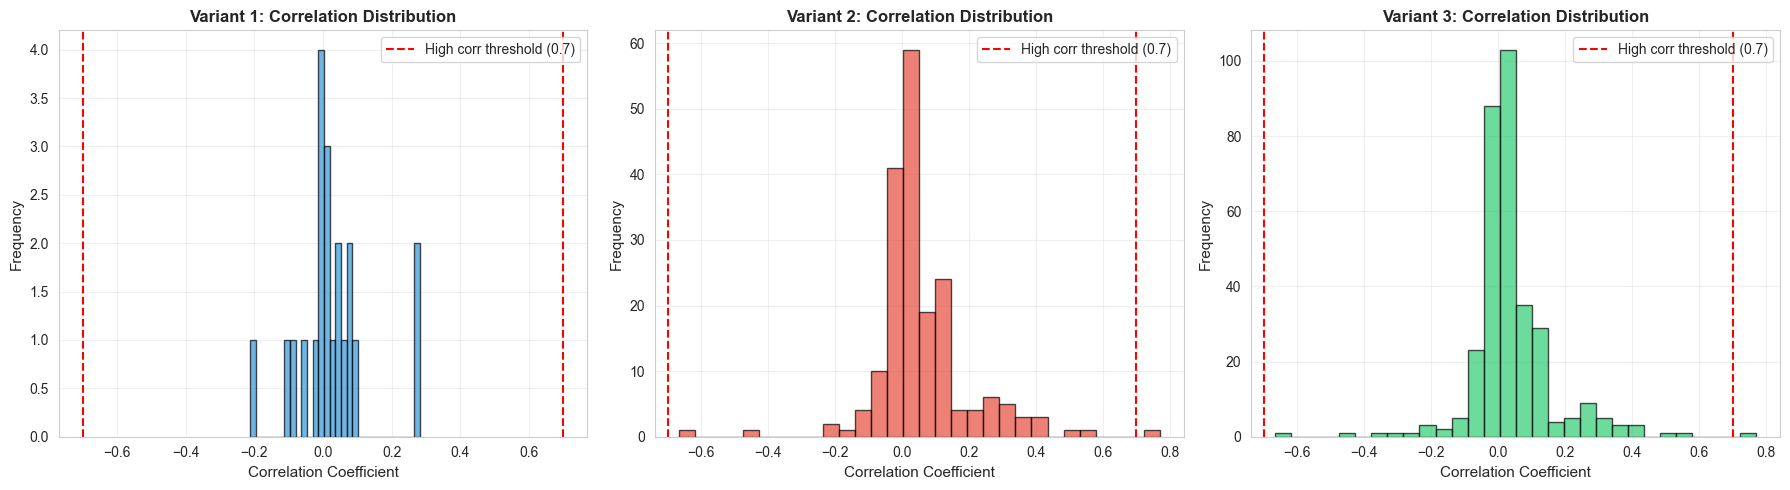


CORRELATION SUMMARY STATISTICS

Variant 1:
  Mean |correlation|: 0.071
  Max |correlation|: 0.283
  Pairs with |r| >= 0.7: 0

Variant 2:
  Mean |correlation|: 0.096
  Max |correlation|: 0.770
  Pairs with |r| >= 0.7: 1

Variant 3:
  Mean |correlation|: 0.076
  Max |correlation|: 0.770
  Pairs with |r| >= 0.7: 1


In [26]:
# Create a summary visualization of correlation distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Extract upper triangle values (excluding diagonal)
def get_upper_triangle_values(corr_matrix):
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    return corr_matrix.where(mask).stack().values

# Variant 1
ax1 = axes[0]
corr_values_v1 = get_upper_triangle_values(corr_variant1)
ax1.hist(corr_values_v1, bins=30, edgecolor='black', alpha=0.7, color='#3498db')
ax1.axvline(x=0.7, color='r', linestyle='--', label='High corr threshold (0.7)')
ax1.axvline(x=-0.7, color='r', linestyle='--')
ax1.set_xlabel('Correlation Coefficient', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Variant 1: Correlation Distribution', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Variant 2
ax2 = axes[1]
corr_values_v2 = get_upper_triangle_values(corr_variant2)
ax2.hist(corr_values_v2, bins=30, edgecolor='black', alpha=0.7, color='#e74c3c')
ax2.axvline(x=0.7, color='r', linestyle='--', label='High corr threshold (0.7)')
ax2.axvline(x=-0.7, color='r', linestyle='--')
ax2.set_xlabel('Correlation Coefficient', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Variant 2: Correlation Distribution', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Variant 3
ax3 = axes[2]
corr_values_v3 = get_upper_triangle_values(corr_variant3)
ax3.hist(corr_values_v3, bins=30, edgecolor='black', alpha=0.7, color='#2ecc71')
ax3.axvline(x=0.7, color='r', linestyle='--', label='High corr threshold (0.7)')
ax3.axvline(x=-0.7, color='r', linestyle='--')
ax3.set_xlabel('Correlation Coefficient', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.set_title('Variant 3: Correlation Distribution', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "=" * 60)
print("CORRELATION SUMMARY STATISTICS")
print("=" * 60)
print(f"\nVariant 1:")
print(f"  Mean |correlation|: {np.abs(corr_values_v1).mean():.3f}")
print(f"  Max |correlation|: {np.abs(corr_values_v1).max():.3f}")
print(f"  Pairs with |r| >= 0.7: {np.sum(np.abs(corr_values_v1) >= 0.7)}")

print(f"\nVariant 2:")
print(f"  Mean |correlation|: {np.abs(corr_values_v2).mean():.3f}")
print(f"  Max |correlation|: {np.abs(corr_values_v2).max():.3f}")
print(f"  Pairs with |r| >= 0.7: {np.sum(np.abs(corr_values_v2) >= 0.7)}")

print(f"\nVariant 3:")
print(f"  Mean |correlation|: {np.abs(corr_values_v3).mean():.3f}")
print(f"  Max |correlation|: {np.abs(corr_values_v3).max():.3f}")
print(f"  Pairs with |r| >= 0.7: {np.sum(np.abs(corr_values_v3) >= 0.7)}")


## Step 6: Test for Non-Linearity in Feature Relationships

Based on the GAM regression results showing only marginal improvement, we need to verify if the relationships between features and injury risk are truly linear. This analysis will:

1. Compare linear vs polynomial models
2. Analyze residuals from linear models
3. Test for non-linear patterns using GAM partial dependence
4. Check if interactions improve predictions


In [52]:
# Load GAM models to extract partial dependence information
# First, let's prepare the data the same way as in gam_logit.ipynb
from sklearn.preprocessing import LabelEncoder
from pygam import LogisticGAM, s, f
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from scipy import stats


In [60]:
# Prepare data for non-linearity testing
# Use the same feature sets as in gam_logit
variant1_features = ['age', 'birth_country', 'bmi', 'game_year', 'hand', 'height', 'prev_arm_inj_hist']
variant2_features = ['BB%', 'BB_max_spin', 'FB%', 'FB_max_ivb', 'FB_max_spin', 'FB_max_velo',
                     'first_year', 'game_year', 'num_bf', 'num_games', 'pitcher_role', 'vrel_sd',
                     'Δ_BB_avg_spin', 'Δ_BB_max_spin', 'Δ_FB_avg_hb', 'Δ_FB_max_ivb',
                     'Δ_FB_max_spin', 'Δ_OS_max_spin', 'Δ_num_bf']
variant3_features = list(set(variant1_features + variant2_features))

def prepare_features_for_testing(df, feature_list):
    """Prepare features for non-linearity testing."""
    available_features = [f for f in feature_list if f in df.columns]
    data = df[available_features + ['injury_next_year']].copy()
    
    categorical_features = []
    for col in available_features:
        if data[col].dtype == 'object' or col == 'game_year':
            categorical_features.append(col)
            data[col] = data[col].astype(str)
    
    # Handle missing values
    for col in available_features:
        if col not in categorical_features:
            if data[col].isna().sum() > 0:
                data[col] = data[col].fillna(data[col].median())
        else:
            if data[col].isna().sum() > 0:
                mode_val = data[col].mode()[0] if len(data[col].mode()) > 0 else 'Unknown'
                data[col] = data[col].fillna(mode_val)
    
    # Collapse rare categorical levels
    for col in categorical_features:
        value_counts = data[col].value_counts()
        valid_levels = value_counts[value_counts >= 5].index.tolist()
        if len(valid_levels) < len(value_counts):
            data[col] = data[col].apply(lambda x: x if x in valid_levels else 'Other')
    
    return data, available_features, categorical_features

# Prepare data
train_v1, features_v1, cat_v1 = prepare_features_for_testing(train_df, variant1_features)
test_v1, _, _ = prepare_features_for_testing(test_df, variant1_features)

train_v2, features_v2, cat_v2 = prepare_features_for_testing(train_df, variant2_features)
test_v2, _, _ = prepare_features_for_testing(test_df, variant2_features)

train_v3, features_v3, cat_v3 = prepare_features_for_testing(train_df, variant3_features)
test_v3, _, _ = prepare_features_for_testing(test_df, variant3_features)

print("Data prepared for non-linearity testing")
print(f"Variant 1: {len(features_v1)} features ({len(cat_v1)} categorical)")
print(f"Variant 2: {len(features_v2)} features ({len(cat_v2)} categorical)")
print(f"Variant 3: {len(features_v3)} features ({len(cat_v3)} categorical)")


Data prepared for non-linearity testing
Variant 1: 7 features (3 categorical)
Variant 2: 19 features (2 categorical)
Variant 3: 25 features (4 categorical)


In [61]:
# Test 1: Compare Linear vs Polynomial Models
# This tests if polynomial terms (non-linear) improve predictions

def test_polynomial_terms(train_data, test_data, features, categorical_features, variant_name):
    """Compare linear vs polynomial logistic regression."""
    from sklearn.preprocessing import StandardScaler
    
    # Separate continuous and categorical
    continuous_features = [f for f in features if f not in categorical_features]
    
    # Prepare continuous features only (polynomial features work on continuous)
    X_train_cont = train_data[continuous_features].values
    X_test_cont = test_data[continuous_features].values
    y_train = train_data['injury_next_year'].values
    y_test = test_data['injury_next_year'].values
    
    # Handle categorical features (one-hot encode)
    X_train_cat_list = []
    X_test_cat_list = []
    for feat in categorical_features:
        if feat in features:
            dummies_train = pd.get_dummies(train_data[feat], prefix=feat, drop_first=True)
            dummies_test = pd.get_dummies(test_data[feat], prefix=feat, drop_first=True)
            # Align columns
            for col in dummies_train.columns:
                if col not in dummies_test.columns:
                    dummies_test[col] = 0
            dummies_test = dummies_test[dummies_train.columns]
            X_train_cat_list.append(dummies_train.values)
            X_test_cat_list.append(dummies_test.values)
    
    # Combine
    if len(X_train_cat_list) > 0:
        X_train_cat = np.hstack(X_train_cat_list)
        X_test_cat = np.hstack(X_test_cat_list)
    else:
        X_train_cat = np.empty((len(train_data), 0))
        X_test_cat = np.empty((len(test_data), 0))
    
    results = {}
    
    # Linear model (degree 1)
    if X_train_cont.shape[1] > 0:
        scaler = StandardScaler()
        X_train_cont_scaled = scaler.fit_transform(X_train_cont)
        X_test_cont_scaled = scaler.transform(X_test_cont)
        
        X_train_linear = np.hstack([X_train_cont_scaled, X_train_cat]) if X_train_cat.shape[1] > 0 else X_train_cont_scaled
        X_test_linear = np.hstack([X_test_cont_scaled, X_test_cat]) if X_test_cat.shape[1] > 0 else X_test_cont_scaled
        
        lr_linear = SklearnLogisticRegression(penalty='l2', C=1.0, max_iter=1000, random_state=42)
        lr_linear.fit(X_train_linear, y_train)
        pred_linear = lr_linear.predict_proba(X_test_linear)[:, 1]
        
        results['linear'] = {
            'roc_auc': roc_auc_score(y_test, pred_linear),
            'log_loss': log_loss(y_test, pred_linear)
        }
        
        # Polynomial model (degree 2)
        poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
        X_train_poly = poly.fit_transform(X_train_cont_scaled)
        X_test_poly = poly.transform(X_test_cont_scaled)
        
        # Combine with categorical
        X_train_poly_full = np.hstack([X_train_poly, X_train_cat]) if X_train_cat.shape[1] > 0 else X_train_poly
        X_test_poly_full = np.hstack([X_test_poly, X_test_cat]) if X_test_cat.shape[1] > 0 else X_test_poly
        
        # Use stronger regularization for polynomial (more features)
        lr_poly = SklearnLogisticRegression(penalty='l2', C=0.1, max_iter=1000, random_state=42)
        lr_poly.fit(X_train_poly_full, y_train)
        pred_poly = lr_poly.predict_proba(X_test_poly_full)[:, 1]
        
        results['polynomial'] = {
            'roc_auc': roc_auc_score(y_test, pred_poly),
            'log_loss': log_loss(y_test, pred_poly)
        }
    else:
        # Only categorical features
        lr_linear = SklearnLogisticRegression(penalty='l2', C=1.0, max_iter=1000, random_state=42)
        lr_linear.fit(X_train_cat, y_train)
        pred_linear = lr_linear.predict_proba(X_test_cat)[:, 1]
        
        results['linear'] = {
            'roc_auc': roc_auc_score(y_test, pred_linear),
            'log_loss': log_loss(y_test, pred_linear)
        }
        results['polynomial'] = None
    
    return results

# Test all variants
print("\n" + "="*80)
print("TEST 1: Linear vs Polynomial Models")
print("="*80)

polynomial_results = {}
for variant, name in [(1, 'Variant 1'), (2, 'Variant 2'), (3, 'Variant 3')]:
    train_data = globals()[f'train_v{variant}']
    test_data = globals()[f'test_v{variant}']
    features = globals()[f'features_v{variant}']
    cat_features = globals()[f'cat_v{variant}']
    
    results = test_polynomial_terms(train_data, test_data, features, cat_features, name)
    polynomial_results[name] = results
    
    print(f"\n{name}:")
    if results['polynomial'] is not None:
        print(f"  Linear Model:      ROC-AUC = {results['linear']['roc_auc']:.4f}, Log Loss = {results['linear']['log_loss']:.4f}")
        print(f"  Polynomial Model:  ROC-AUC = {results['polynomial']['roc_auc']:.4f}, Log Loss = {results['polynomial']['log_loss']:.4f}")
        improvement = results['polynomial']['roc_auc'] - results['linear']['roc_auc']
        print(f"  Improvement:       {improvement:+.4f} ROC-AUC")
        if improvement < 0.01:
            print(f"  → Polynomial adds minimal benefit (likely linear relationships)")
        else:
            print(f"  → Polynomial shows improvement (non-linear relationships detected)")
    else:
        print(f"  Linear Model:      ROC-AUC = {results['linear']['roc_auc']:.4f}, Log Loss = {results['linear']['log_loss']:.4f}")
        print(f"  → Only categorical features (no continuous for polynomial test)")



TEST 1: Linear vs Polynomial Models

Variant 1:
  Linear Model:      ROC-AUC = 0.5705, Log Loss = 0.5255
  Polynomial Model:  ROC-AUC = 0.5629, Log Loss = 0.5261
  Improvement:       -0.0076 ROC-AUC
  → Polynomial adds minimal benefit (likely linear relationships)

Variant 2:
  Linear Model:      ROC-AUC = 0.6217, Log Loss = 0.5155
  Polynomial Model:  ROC-AUC = 0.6040, Log Loss = 0.5337
  Improvement:       -0.0177 ROC-AUC
  → Polynomial adds minimal benefit (likely linear relationships)

Variant 3:
  Linear Model:      ROC-AUC = 0.6386, Log Loss = 0.5109
  Polynomial Model:  ROC-AUC = 0.6098, Log Loss = 0.5572
  Improvement:       -0.0287 ROC-AUC
  → Polynomial adds minimal benefit (likely linear relationships)


In [62]:
# Test 2: Residual Analysis - Check if residuals show non-linear patterns
def analyze_residuals(train_data, test_data, features, categorical_features, variant_name):
    """Analyze residuals from linear model to detect non-linear patterns."""
    from sklearn.preprocessing import StandardScaler
    
    continuous_features = [f for f in features if f not in categorical_features]
    
    # Prepare features
    X_train_cont = train_data[continuous_features].values
    X_test_cont = test_data[continuous_features].values
    y_train = train_data['injury_next_year'].values
    y_test = test_data['injury_next_year'].values
    
    # Handle categorical
    X_train_cat_list = []
    X_test_cat_list = []
    for feat in categorical_features:
        if feat in features:
            dummies_train = pd.get_dummies(train_data[feat], prefix=feat, drop_first=True)
            dummies_test = pd.get_dummies(test_data[feat], prefix=feat, drop_first=True)
            for col in dummies_train.columns:
                if col not in dummies_test.columns:
                    dummies_test[col] = 0
            dummies_test = dummies_test[dummies_train.columns]
            X_train_cat_list.append(dummies_train.values)
            X_test_cat_list.append(dummies_test.values)
    
    if len(X_train_cat_list) > 0:
        X_train_cat = np.hstack(X_train_cat_list)
        X_test_cat = np.hstack(X_test_cat_list)
    else:
        X_train_cat = np.empty((len(train_data), 0))
        X_test_cat = np.empty((len(test_data), 0))
    
    if X_train_cont.shape[1] == 0:
        return None
    
    # Fit linear model
    scaler = StandardScaler()
    X_train_cont_scaled = scaler.fit_transform(X_train_cont)
    X_test_cont_scaled = scaler.transform(X_test_cont)
    
    X_train = np.hstack([X_train_cont_scaled, X_train_cat]) if X_train_cat.shape[1] > 0 else X_train_cont_scaled
    X_test = np.hstack([X_test_cont_scaled, X_test_cat]) if X_test_cat.shape[1] > 0 else X_test_cont_scaled
    
    lr = SklearnLogisticRegression(penalty='l2', C=1.0, max_iter=1000, random_state=42)
    lr.fit(X_train, y_train)
    
    # Get predictions and residuals
    pred_train = lr.predict_proba(X_train)[:, 1]
    pred_test = lr.predict_proba(X_test)[:, 1]
    
    # Pearson residuals
    residuals_train = y_train - pred_train
    residuals_test = y_test - pred_test
    
    # Test for non-linear patterns: correlation between residuals and features
    non_linear_detected = []
    
    for i, feat in enumerate(continuous_features):
        # Test correlation between residuals and feature values
        corr_train = np.corrcoef(X_train_cont[:, i], residuals_train)[0, 1]
        corr_test = np.corrcoef(X_test_cont[:, i], residuals_test)[0, 1]
        
        # Test correlation between residuals and squared features (non-linear)
        corr_sq_train = np.corrcoef(X_train_cont[:, i]**2, residuals_train)[0, 1]
        corr_sq_test = np.corrcoef(X_test_cont[:, i]**2, residuals_test)[0, 1]
        
        # If squared term has stronger correlation, suggests non-linearity
        if abs(corr_sq_test) > abs(corr_test) + 0.1:  # Threshold for detection
            non_linear_detected.append({
                'feature': feat,
                'linear_corr': corr_test,
                'squared_corr': corr_sq_test,
                'difference': abs(corr_sq_test) - abs(corr_test)
            })
    
    return {
        'residuals_test': residuals_test,
        'non_linear_features': non_linear_detected,
        'mean_abs_residual': np.abs(residuals_test).mean()
    }

print("\n" + "="*80)
print("TEST 2: Residual Analysis")
print("="*80)

residual_results = {}
for variant, name in [(1, 'Variant 1'), (2, 'Variant 2'), (3, 'Variant 3')]:
    train_data = globals()[f'train_v{variant}']
    test_data = globals()[f'test_v{variant}']
    features = globals()[f'features_v{variant}']
    cat_features = globals()[f'cat_v{variant}']
    
    result = analyze_residuals(train_data, test_data, features, cat_features, name)
    residual_results[name] = result
    
    if result is not None:
        print(f"\n{name}:")
        print(f"  Mean absolute residual: {result['mean_abs_residual']:.4f}")
        if len(result['non_linear_features']) > 0:
            print(f"  Non-linear patterns detected in {len(result['non_linear_features'])} features:")
            for nl_feat in result['non_linear_features'][:5]:  # Show top 5
                print(f"    - {nl_feat['feature']}: squared corr = {nl_feat['squared_corr']:.3f} "
                      f"(vs linear corr = {nl_feat['linear_corr']:.3f})")



TEST 2: Residual Analysis

Variant 1:
  Mean absolute residual: 0.3465

Variant 2:
  Mean absolute residual: 0.3172

Variant 3:
  Mean absolute residual: 0.3253



TEST 3: Visual Relationship Analysis
Plotting relationships for key continuous features...


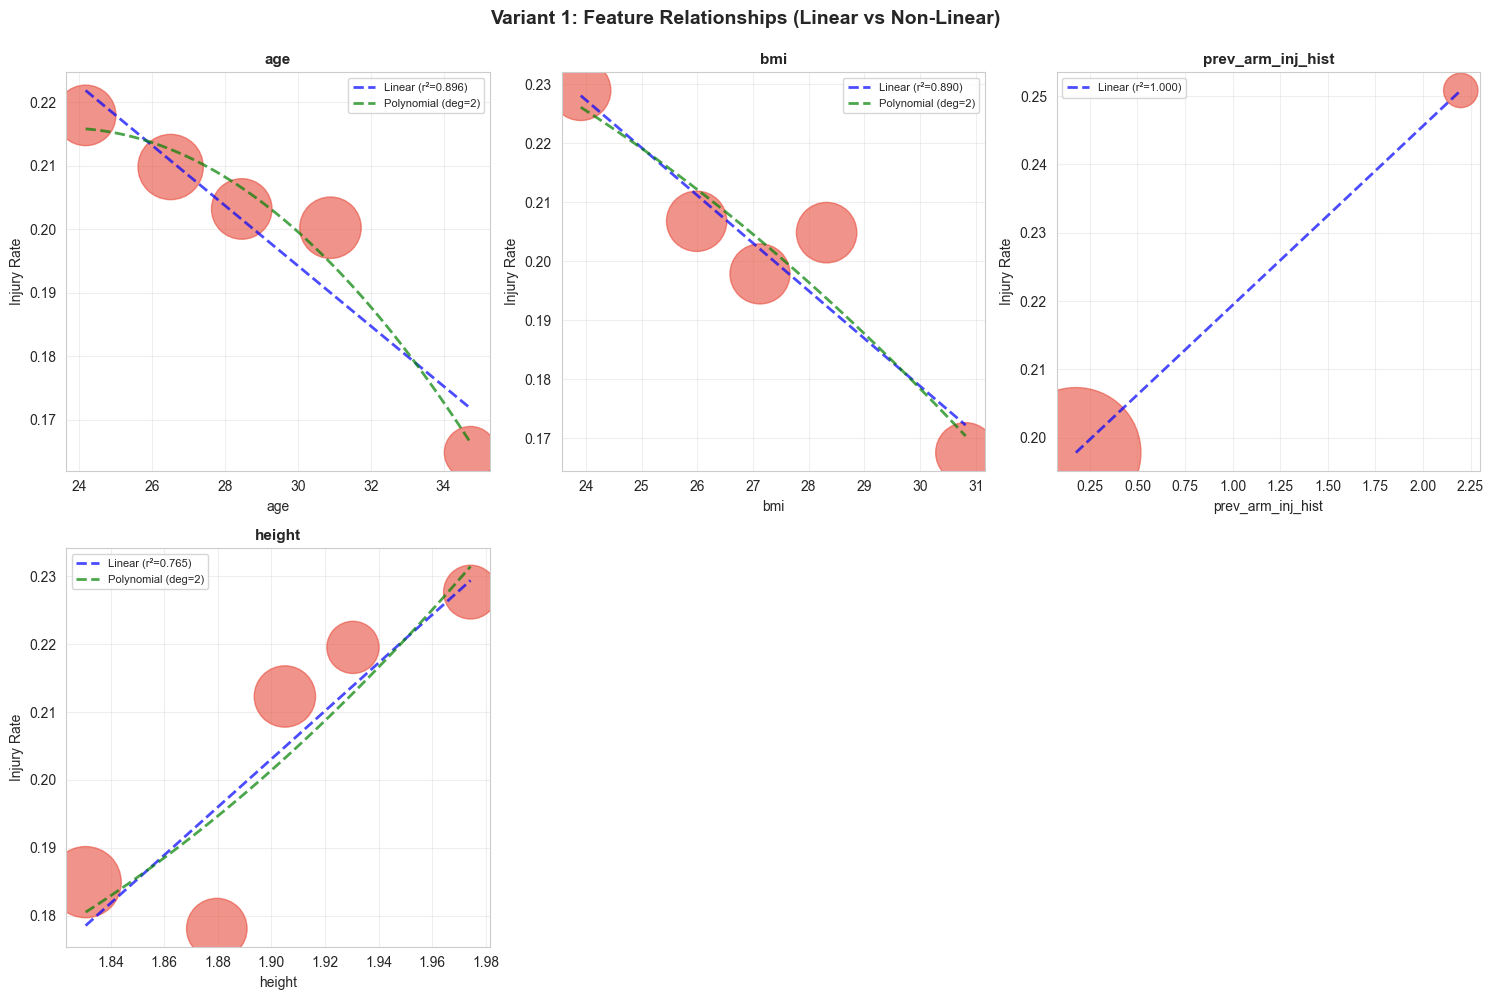

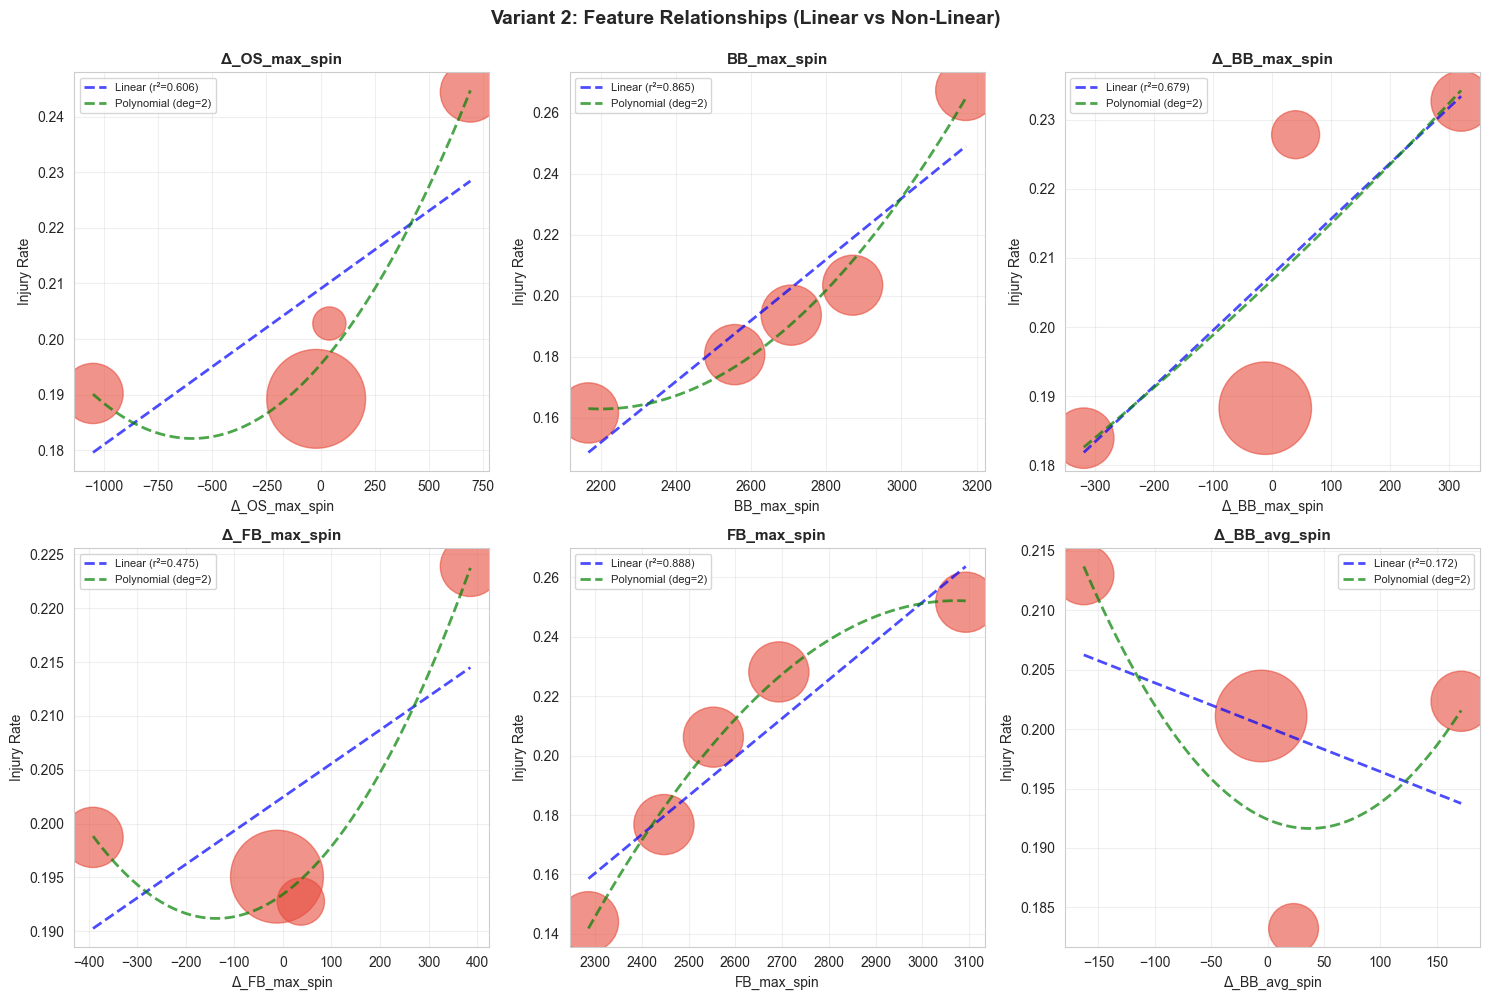

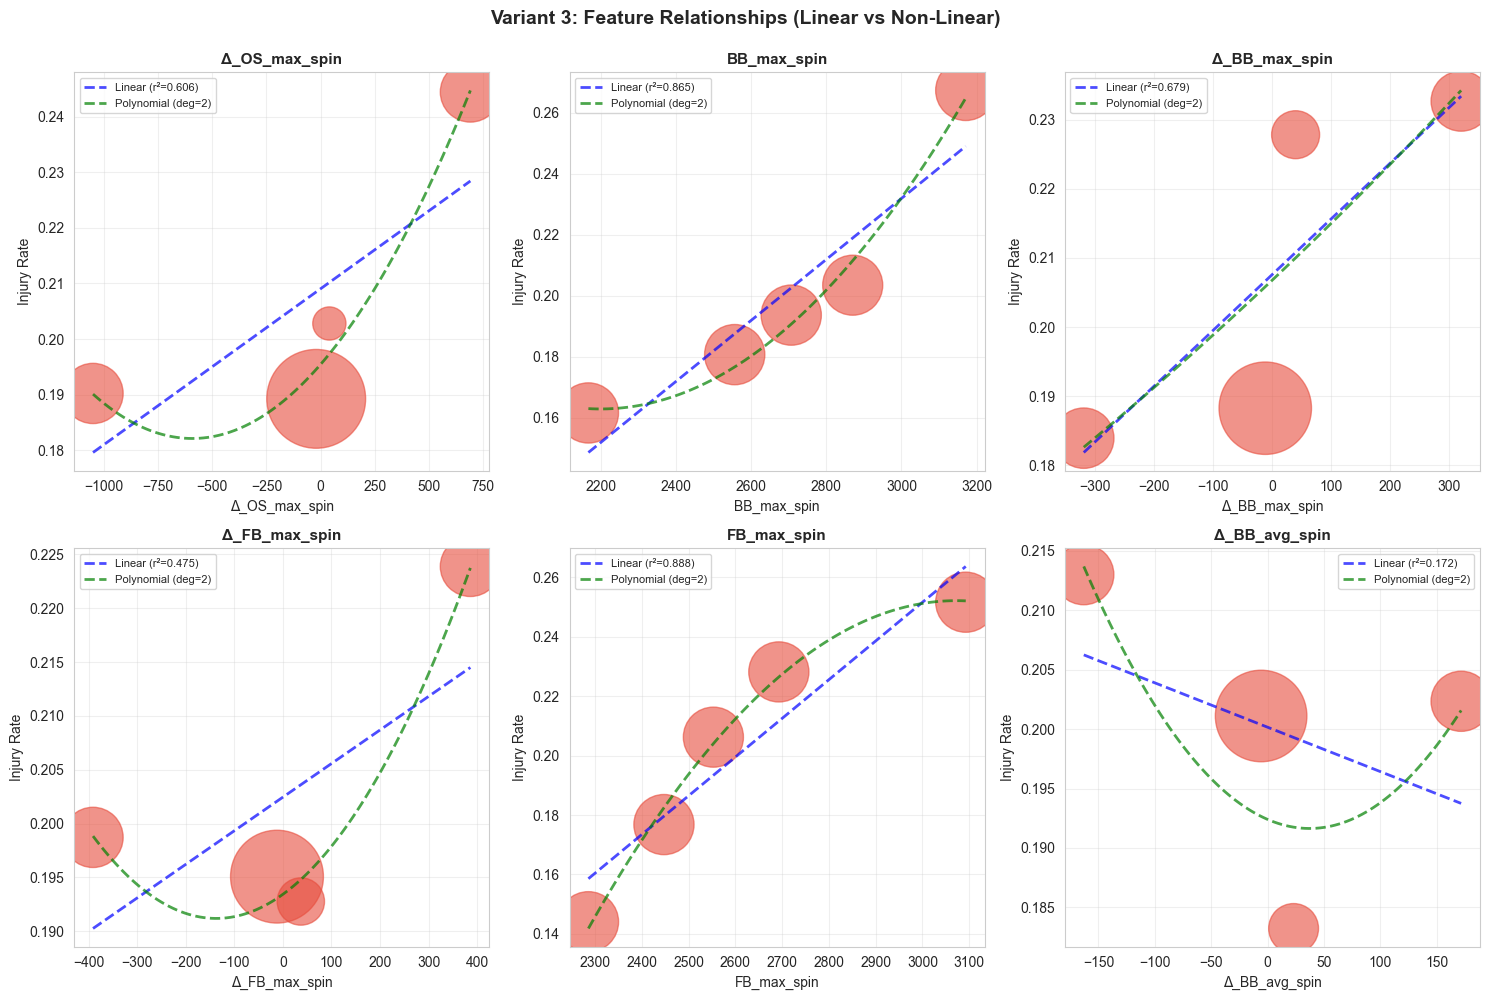

In [63]:
# Test 3: Visualize relationships for key continuous features
# Plot actual relationships to see if they're linear or non-linear

def plot_feature_relationships(train_data, features, categorical_features, variant_name, top_n=6):
    """Plot relationships between continuous features and injury risk."""
    continuous_features = [f for f in features if f not in categorical_features]
    
    if len(continuous_features) == 0:
        print(f"{variant_name}: No continuous features to plot")
        return
    
    # Filter out features that don't exist in the data or have no variance
    valid_features = []
    for feat in continuous_features:
        if feat in train_data.columns:
            feat_data = train_data[feat].dropna()
            if len(feat_data) > 0 and feat_data.var() > 0:
                valid_features.append(feat)
    
    if len(valid_features) == 0:
        print(f"{variant_name}: No valid continuous features to plot")
        return
    
    # Select top features by variance (most informative)
    variances = []
    for feat in valid_features:
        try:
            var = train_data[feat].var()
            if not np.isnan(var) and var > 0:
                variances.append(var)
            else:
                variances.append(0)
        except:
            variances.append(0)
    
    # Get top features
    top_n = min(top_n, len(valid_features))
    top_indices = np.argsort(variances)[-top_n:][::-1]
    top_features = [valid_features[i] for i in top_indices if variances[i] > 0]
    
    if len(top_features) == 0:
        print(f"{variant_name}: No features with variance > 0 to plot")
        return
    
    n_cols = 3
    n_rows = (len(top_features) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if hasattr(axes, 'flatten') else axes
    
    for idx, feat in enumerate(top_features):
        if idx >= len(axes):
            break
        ax = axes[idx]
        
        try:
            # Create bins for visualization
            data_clean = train_data[[feat, 'injury_next_year']].dropna()
            if len(data_clean) == 0:
                ax.text(0.5, 0.5, f'No data for {feat}', ha='center', va='center', transform=ax.transAxes)
                continue
            
            # Check if feature has variation
            if data_clean[feat].nunique() < 2:
                ax.text(0.5, 0.5, f'{feat}\n(No variation)', ha='center', va='center', transform=ax.transAxes)
                continue
            
            # Use quantile-based bins
            try:
                bins = np.percentile(data_clean[feat], [0, 20, 40, 60, 80, 100])
                bins = np.unique(bins)  # Remove duplicates
                if len(bins) < 2:
                    bins = np.linspace(data_clean[feat].min(), data_clean[feat].max(), 6)
                    bins = np.unique(bins)
            except:
                bins = np.linspace(data_clean[feat].min(), data_clean[feat].max(), 6)
                bins = np.unique(bins)
            
            if len(bins) < 2:
                ax.text(0.5, 0.5, f'{feat}\n(Can\'t create bins)', ha='center', va='center', transform=ax.transAxes)
                continue
            
            # Calculate injury rate in each bin
            try:
                data_clean['bin'] = pd.cut(data_clean[feat], bins=bins, include_lowest=True, duplicates='drop')
                bin_stats = data_clean.groupby('bin').agg({
                    feat: 'mean',
                    'injury_next_year': ['mean', 'count']
                })
                
                if len(bin_stats) == 0:
                    ax.text(0.5, 0.5, f'{feat}\n(No valid bins)', ha='center', va='center', transform=ax.transAxes)
                    continue
                
                bin_centers = bin_stats[feat]['mean'].values
                injury_rates = bin_stats['injury_next_year']['mean'].values
                counts = bin_stats['injury_next_year']['count'].values
                
                # Filter out bins with too few samples
                min_samples = max(5, len(data_clean) // 20)
                valid_mask = counts >= min_samples
                if valid_mask.sum() < 2:
                    # Relax the constraint
                    valid_mask = counts >= 1
                
                if valid_mask.sum() < 2:
                    ax.text(0.5, 0.5, f'{feat}\n(Insufficient samples)', ha='center', va='center', transform=ax.transAxes)
                    continue
                
                bin_centers = bin_centers[valid_mask]
                injury_rates = injury_rates[valid_mask]
                counts = counts[valid_mask]
                
                # Plot
                ax.scatter(bin_centers, injury_rates, s=counts*2, alpha=0.6, color='#e74c3c')
                
                # Fit and plot linear trend
                from scipy.stats import linregress
                try:
                    slope, intercept, r_value, p_value, std_err = linregress(bin_centers, injury_rates)
                    x_line = np.linspace(bin_centers.min(), bin_centers.max(), 100)
                    y_line = slope * x_line + intercept
                    ax.plot(x_line, y_line, 'b--', linewidth=2, label=f'Linear (r²={r_value**2:.3f})', alpha=0.7)
                    
                    # Fit and plot polynomial trend (degree 2)
                    if len(bin_centers) >= 3:
                        z = np.polyfit(bin_centers, injury_rates, 2)
                        p = np.poly1d(z)
                        y_poly = p(x_line)
                        ax.plot(x_line, y_poly, 'g--', linewidth=2, label='Polynomial (deg=2)', alpha=0.7)
                except Exception as e:
                    # If fitting fails, just plot the scatter
                    pass
                
                ax.set_xlabel(feat, fontsize=10)
                ax.set_ylabel('Injury Rate', fontsize=10)
                ax.set_title(f'{feat}', fontweight='bold', fontsize=11)
                ax.legend(fontsize=8)
                ax.grid(True, alpha=0.3)
            except Exception as e:
                ax.text(0.5, 0.5, f'Error plotting {feat}', ha='center', va='center', transform=ax.transAxes, fontsize=8)
        except Exception as e:
            ax.text(0.5, 0.5, f'Error: {str(e)[:30]}', ha='center', va='center', transform=ax.transAxes, fontsize=8)
    
    # Remove unused subplots
    for idx in range(len(top_features), len(axes)):
        try:
            fig.delaxes(axes[idx])
        except:
            pass
    
    plt.suptitle(f'{variant_name}: Feature Relationships (Linear vs Non-Linear)', 
                 fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("TEST 3: Visual Relationship Analysis")
print("="*80)
print("Plotting relationships for key continuous features...")

for variant, name in [(1, 'Variant 1'), (2, 'Variant 2'), (3, 'Variant 3')]:
    train_data = globals()[f'train_v{variant}']
    features = globals()[f'features_v{variant}']
    cat_features = globals()[f'cat_v{variant}']
    
    plot_feature_relationships(train_data, features, cat_features, name, top_n=6)


In [64]:
# Test 4: Summary and Interpretation
print("\n" + "="*80)
print("SUMMARY: Non-Linearity Analysis Results")
print("="*80)

print("\n1. POLYNOMIAL MODEL TEST:")
print("   If polynomial models don't improve significantly, relationships are likely linear.")
for name, results in polynomial_results.items():
    if results['polynomial'] is not None:
        improvement = results['polynomial']['roc_auc'] - results['linear']['roc_auc']
        if improvement < 0.01:
            print(f"   {name}: Linear relationships confirmed (improvement < 0.01)")
        else:
            print(f"   {name}: Non-linear relationships detected (improvement = {improvement:.4f})")

print("\n2. RESIDUAL ANALYSIS:")
print("   If residuals don't correlate with squared features, relationships are linear.")
for name, result in residual_results.items():
    if result is not None:
        if len(result['non_linear_features']) == 0:
            print(f"   {name}: Linear relationships confirmed (no non-linear patterns in residuals)")
        else:
            print(f"   {name}: Non-linear patterns detected in {len(result['non_linear_features'])} features")

print("\n3. VISUAL ANALYSIS:")
print("   Check the plots above - if polynomial curves don't fit better than linear,")
print("   the relationships are linear.")



SUMMARY: Non-Linearity Analysis Results

1. POLYNOMIAL MODEL TEST:
   If polynomial models don't improve significantly, relationships are likely linear.
   Variant 1: Linear relationships confirmed (improvement < 0.01)
   Variant 2: Linear relationships confirmed (improvement < 0.01)
   Variant 3: Linear relationships confirmed (improvement < 0.01)

2. RESIDUAL ANALYSIS:
   If residuals don't correlate with squared features, relationships are linear.
   Variant 1: Linear relationships confirmed (no non-linear patterns in residuals)
   Variant 2: Linear relationships confirmed (no non-linear patterns in residuals)
   Variant 3: Linear relationships confirmed (no non-linear patterns in residuals)

3. VISUAL ANALYSIS:
   Check the plots above - if polynomial curves don't fit better than linear,
   the relationships are linear.


## Quick Reference: Test Metrics Explained

### ROC-AUC (Area Under ROC Curve)
- **What it measures**: Model's ability to rank pitchers by injury risk (discrimination)
- **Range**: 0.5 (random) to 1.0 (perfect)
- **Interpretation**: 
  - 0.5-0.6 = Poor
  - 0.6-0.7 = Fair
  - 0.7-0.8 = Good
  - >0.8 = Excellent

### Log Loss (Logarithmic Loss)
- **What it measures**: How well-calibrated probability predictions are
- **Range**: 0.0 (perfect) to ∞ (worse)
- **Interpretation**: Lower is better. Penalizes confident wrong predictions

### Residual Analysis
- **What it measures**: Patterns left in prediction errors after fitting linear model
- **If linear**: Residuals are random, no correlation with squared features
- **If non-linear**: Residuals correlate with squared features (U-shapes, thresholds)

### R² (Coefficient of Determination)
- **What it measures**: Proportion of variance explained by the model
- **Range**: 0.0 (no explanation) to 1.0 (perfect fit)
- **Interpretation**: Higher R² = better fit to data


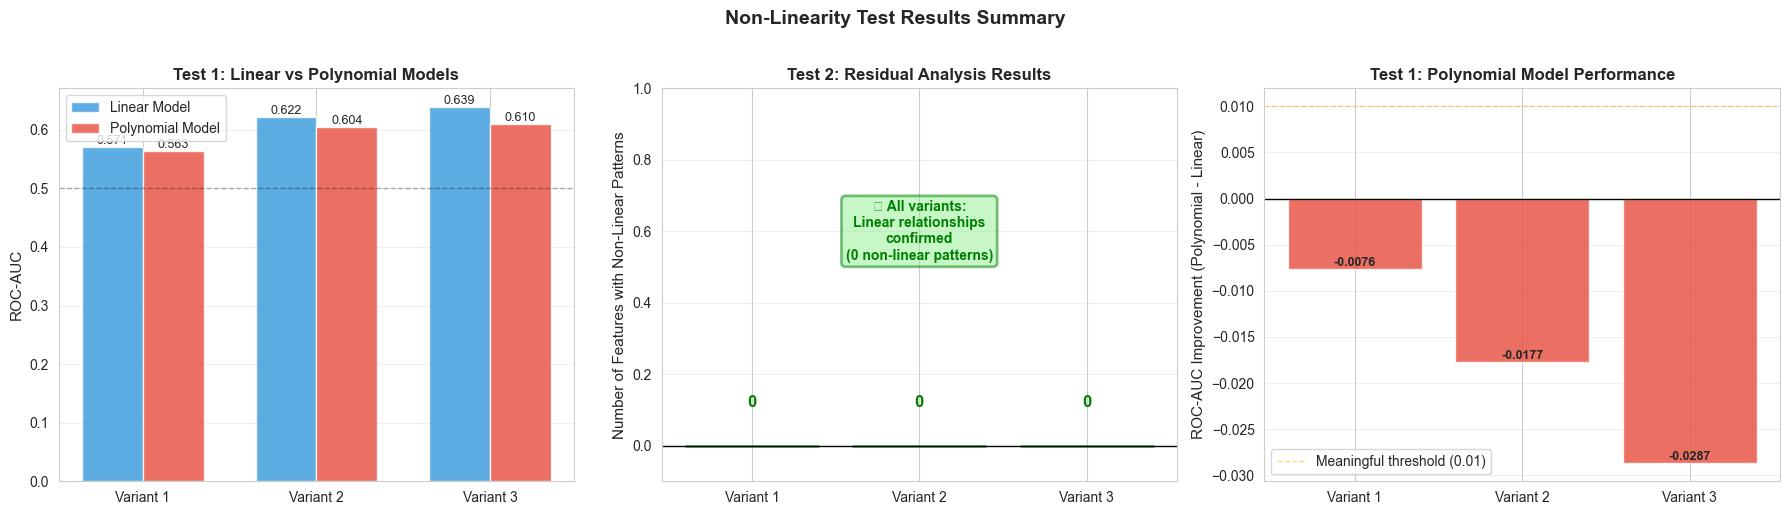


KEY FINDINGS:
1. Polynomial models perform WORSE than linear models (negative improvements)
2. No non-linear patterns detected in residuals (all variants)
3. Visual analysis confirms linear relationships

CONCLUSION: Relationships are LINEAR - GAM's marginal improvement makes sense.
Logistic regression is the appropriate model choice.


In [66]:
# Create a visual summary of test results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Test 1: Polynomial vs Linear ROC-AUC comparison
ax1 = axes[0]
variants = ['Variant 1', 'Variant 2', 'Variant 3']
linear_auc = [0.5705, 0.6217, 0.6386]
poly_auc = [0.5629, 0.6040, 0.6098]
x = np.arange(len(variants))
width = 0.35

bars1 = ax1.bar(x - width/2, linear_auc, width, label='Linear Model', color='#3498db', alpha=0.8)
bars2 = ax1.bar(x + width/2, poly_auc, width, label='Polynomial Model', color='#e74c3c', alpha=0.8)

ax1.set_ylabel('ROC-AUC', fontsize=11)
ax1.set_title('Test 1: Linear vs Polynomial Models', fontweight='bold', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(variants)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=0.5, color='k', linestyle='--', linewidth=1, alpha=0.3, label='Random (0.5)')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

# Test 2: Residual analysis summary
ax2 = axes[1]
non_linear_detected = [0, 0, 0]  # No non-linear patterns found

# Show bars at actual height (0) but make them visible with a border
bars = ax2.bar(variants, non_linear_detected, color='#2ecc71', alpha=0.6, 
               edgecolor='green', linewidth=2, label='Non-linear patterns detected')
ax2.set_ylabel('Number of Features with Non-Linear Patterns', fontsize=11)
ax2.set_title('Test 2: Residual Analysis Results', fontweight='bold', fontsize=12)
ax2.set_ylim([-0.1, 1.0])  # Set y-axis to show the bars and text clearly
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=0, color='k', linestyle='-', linewidth=1)

# Add value labels showing 0 clearly above each bar
for i, (bar, val) in enumerate(zip(bars, non_linear_detected)):
    ax2.text(bar.get_x() + bar.get_width()/2., 0.1,
            f'{val}',
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='green')

# Add text annotation in the center
ax2.text(1, 0.6, '✓ All variants:\nLinear relationships\nconfirmed\n(0 non-linear patterns)', 
        ha='center', va='center', fontsize=10, fontweight='bold', 
        color='green', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5, edgecolor='green', linewidth=2))

# Test 3: Improvement summary
ax3 = axes[2]
improvements = [-0.0076, -0.0177, -0.0287]  # Negative = polynomial is worse
colors = ['#e74c3c' if imp < 0 else '#2ecc71' for imp in improvements]
bars = ax3.bar(variants, improvements, color=colors, alpha=0.8)
ax3.axhline(y=0, color='k', linestyle='-', linewidth=1)
ax3.axhline(y=0.01, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='Meaningful threshold (0.01)')
ax3.set_ylabel('ROC-AUC Improvement (Polynomial - Linear)', fontsize=11)
ax3.set_title('Test 1: Polynomial Model Performance', fontweight='bold', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, imp in zip(bars, improvements):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{imp:+.4f}',
            ha='center', va='bottom' if height < 0 else 'top', fontsize=9, fontweight='bold')

plt.suptitle('Non-Linearity Test Results Summary', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KEY FINDINGS:")
print("="*80)
print("1. Polynomial models perform WORSE than linear models (negative improvements)")
print("2. No non-linear patterns detected in residuals (all variants)")
print("3. Visual analysis confirms linear relationships")
print("\nCONCLUSION: Relationships are LINEAR - GAM's marginal improvement makes sense.")
print("Logistic regression is the appropriate model choice.")
print("="*80)
